<a href="https://colab.research.google.com/github/DomenicoArmillotta/MSC_thesis-Uml_quality_assessment_with_ML/blob/main/provaOPENcv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Library & Drive

In [1]:
!pip install detecto
import cv2
from google.colab import drive
from matplotlib import pyplot as plt
# setup directory used in the project for training and test phase
import cv2
from google.colab import drive
from matplotlib import pyplot as plt
from detecto import core, visualize, utils
from detecto.core import Dataset, DataLoader
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


In [2]:
# setup directory used in the project for training and test phase
# Mount Google Drive (if not already mounted)
drive.mount('/content/drive')

Mounted at /content/drive


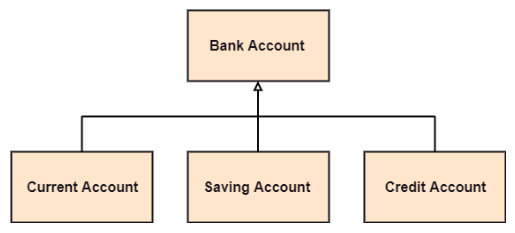

In [3]:
img = cv2.imread('/content/drive/MyDrive/UML/class2.png')
#show image
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')  # Rimuove gli assi dell'immagine
plt.show()


# Faster-RCNN

## Xml - Jpg / Preprocessing and organiztion file

rename from 0 to #file

In [ ]:
import os
import glob

def rename_files_with_same_base(directory_path):
    # Get a list of all files in the directory with different extensions
    files = glob.glob(os.path.join(directory_path, '*.*'))

    # Create a dictionary to store the mapping between old names and new names
    name_mapping = {}

    for file_path in files:
        # Get the base name without the extension
        base_name = os.path.splitext(os.path.basename(file_path))[0]

        if base_name not in name_mapping:
            # If the base name is not already in the mapping, add it with a new number
            name_mapping[base_name] = len(name_mapping) + 1

    # Rename the files using the mapping
    for file_path in files:
        base_name = os.path.splitext(os.path.basename(file_path))[0]
        file_extension = os.path.splitext(file_path)[1]
        new_name = str(name_mapping[base_name]) + file_extension

        # Construct the new path and rename the file
        new_path = os.path.join(directory_path, new_name)
        os.rename(file_path, new_path)

if __name__ == "__main__":
    directory_path = '/content/drive/My Drive/dataset_label/train/'
    rename_files_with_same_base(directory_path)


In [ ]:
import os

def check_files_with_whitespace(directory_path):
    files_with_whitespace = []
    for filename in os.listdir(directory_path):
        if ' ' in filename:
            files_with_whitespace.append(filename)
    return files_with_whitespace

# Replace 'your_directory_path' with the path of the directory you want to check
directory_path = '/content/drive/My Drive/dataset_label/train/'
files_with_whitespace = check_files_with_whitespace(directory_path)

if files_with_whitespace:
    print("Files with whitespace in their names:")
    for filename in files_with_whitespace:
        print(filename)
else:
    print("No files with whitespace in their names found.")


No files with whitespace in their names found.


With the ImageLabel labelling software , I created for each uml schema image an associated .xml , this xml having been created locally , had the path to the local machine. So this script rewrites the 'xml by replacing the path.
The xml - jpg association is necessary for model training , because the xml includes the bounded boxes

In [ ]:
import os
import re
import glob
import xml.etree.ElementTree as ET


def rename_filename_and_path_in_xml(directory_path):
    # Get a list of all XML files in the directory
    xml_files = glob.glob(os.path.join(directory_path, '*.xml'))

    for xml_file in xml_files:
        with open(xml_file, 'r') as file:
            xml_content = file.read()

        # Extract the base filename (without extension) and get the corresponding image filename
        base_filename = os.path.splitext(os.path.basename(xml_file))[0]
        tree = ET.ElementTree(ET.fromstring(xml_content))
        root = tree.getroot()
        filename = [elem.text for elem in root.findall('.//filename')]
        extension = filename[0].split('.')[-1]
        if extension == 'jpg' :
          new_filename = f"{base_filename}.jpg"
        elif extension == 'png' :
          new_filename = f"{base_filename}.png"


        # Replace the <filename> and <path> tags in the XML content
        xml_content = re.sub(r'<filename>.*?<\/filename>', f'<filename>{new_filename}</filename>', xml_content)
        xml_content = re.sub(r'<path>.*?<\/path>', f'<path>/content/drive/My Drive/dataset_label/train/{new_filename}</path>', xml_content)

        # Write the updated XML content back to the file
        with open(xml_file, 'w') as file:
            file.write(xml_content)

if __name__ == "__main__":
    directory_path = '/content/drive/My Drive/dataset_label/train/'
    rename_filename_and_path_in_xml(directory_path)


png
png
jpg
png
jpeg
png
png
png
png
png
png
png
png
png
png
png
png
png
png
png
png
png
png
jpg
png
png
png
jpg
jpg
jpg
jpg
png
jpg
jpg
jpg
png
png
jpg
jpg
png
jpg
png
png
jpg
png
png
png
jpg
jpg
png
png
png
png
jpeg
jpg
png
png
jpg
png
png
png
png
jpg
jpg
png
png
png
jpg
png
png
png
jpg
png
png
jpg
jpeg
png
jpg
png
png
png
jpg
jpg
png
png
png
png
png
png
png
jpeg
png
jpg
png
png
png
jpg
jpg
png
png
jpg
png
png
png
png
png
png
png
png
png
png
png
png


##Training

In [ ]:
from detecto import utils
train = '/content/drive/MyDrive/dataset_label/train/'
utils.xml_to_csv(train, 'train.csv')


,filename,width,height,class,xmin,ymin,xmax,ymax,image_id
0,2.png,860,951,class,444,457,609,513,0
1,2.png,860,951,class,662,454,860,517,0
2,2.png,860,951,class,673,303,860,373,0
3,2.png,860,951,class,440,375,605,432,0
4,2.png,860,951,class,459,305,612,373,0
...,...,...,...,...,...,...,...,...,...
2711,114.png,1779,951,arrow,1299,436,1415,535,110
2712,114.png,1779,951,arrow,1259,332,1581,682,110
2713,114.png,1779,951,arrow,1584,217,1658,634,110
2714,114.png,1779,951,arrow,1308,704,1355,751,110


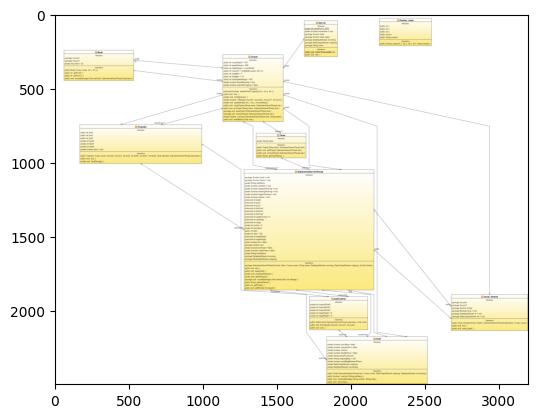

In [ ]:
from detecto import core, utils
import matplotlib.pyplot as plt


image = utils.read_image('/content/drive/MyDrive/dataset_label/train/47.png')

plt.imshow(image)
plt.show()

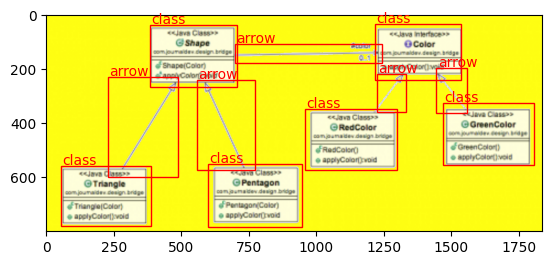

In [ ]:
from torchvision import transforms
from detecto import core
transform_img = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(800),
    transforms.RandomHorizontalFlip(0.3),
    transforms.ToTensor(),
    utils.normalize_transform(),
])
dataset = core.Dataset('train.csv', train , transform=transform_img)

from detecto import visualize
image, information = dataset[47]
visualize.show_labeled_image(image, information['boxes'], information['labels'])


In [ ]:
dataloader = core.DataLoader(dataset)
dataloader
categories = ['class', 'arrow' , 'cross' , 'line']
model = core.Model(categories)

Epoch 1 of 8
Begin iterating over training dataset


100%|██████████| 111/111 [00:36<00:00,  3.05it/s]


Epoch 2 of 8
Begin iterating over training dataset


100%|██████████| 111/111 [00:27<00:00,  4.08it/s]


Epoch 3 of 8
Begin iterating over training dataset


100%|██████████| 111/111 [00:28<00:00,  3.91it/s]


Epoch 4 of 8
Begin iterating over training dataset


100%|██████████| 111/111 [00:27<00:00,  3.99it/s]


Epoch 5 of 8
Begin iterating over training dataset


100%|██████████| 111/111 [00:27<00:00,  4.03it/s]


Epoch 6 of 8
Begin iterating over training dataset


100%|██████████| 111/111 [00:27<00:00,  4.02it/s]


Epoch 7 of 8
Begin iterating over training dataset


100%|██████████| 111/111 [00:27<00:00,  4.00it/s]


Epoch 8 of 8
Begin iterating over training dataset


100%|██████████| 111/111 [00:27<00:00,  4.03it/s]


ValueError: ignored

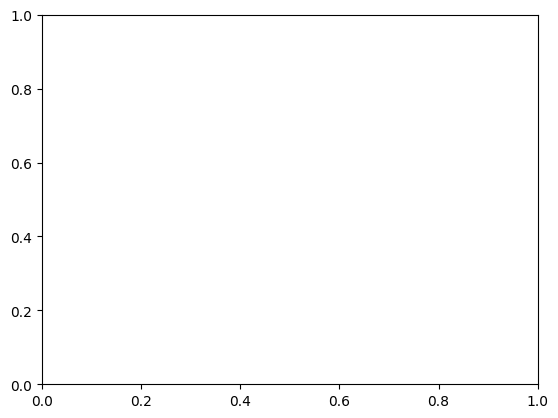

In [ ]:
history = model.fit(dataloader, epochs = 8 , learning_rate=0.001 , verbose = True)
model.save("/content/drive/MyDrive/dataset_label/model/uml_weights.pth")
plt.plot(history)
plt.show()
uml_model = model.get_internal_model()
print(type(uml_model))

Image Shape:  (261, 500, 3)
Initial predictions, w/o supression of overlapping bbox and accuracy filter
Total number of preictions:  34 



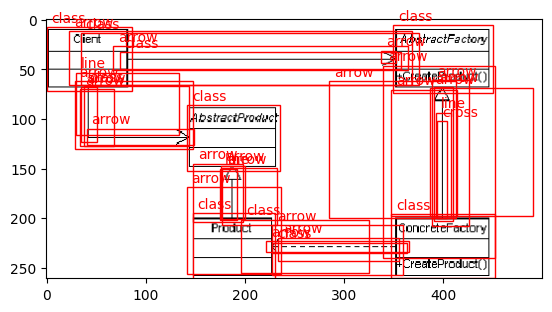




Filtered predictions after threshodling, i.e, accuracy > 0.25.
Total number of preictions:  10 



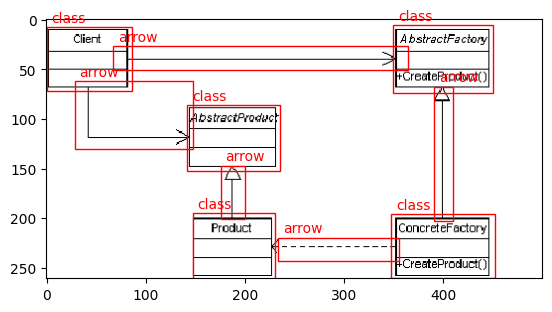



tensor([141.3789,  85.9625, 235.7707, 152.6816]) tensor(0.9960) class
tensor([147.3157, 194.6507, 229.9978, 261.0000]) tensor(0.9959) class
tensor([347.0215, 196.0160, 451.7340, 260.0413]) tensor(0.9956) class
tensor([349.4445,   5.5680, 450.3354,  74.0697]) tensor(0.9956) class
tensor([ 0.0000,  7.3536, 85.7262, 72.1650]) tensor(0.9951) class
tensor([175.3124, 147.0904, 200.0824, 201.0679]) tensor(0.9474) arrow
tensor([390.6566,  67.3890, 409.8688, 203.0674]) tensor(0.9235) arrow
tensor([ 66.7537,  26.4497, 363.9314,  50.9222]) tensor(0.8496) arrow
tensor([ 28.2325,  61.6529, 147.2331, 130.5559]) tensor(0.7388) arrow
tensor([233.4880, 219.4836, 354.8443, 243.2385]) tensor(0.7086) arrow


In [ ]:
import numpy as np
image=utils.read_image('/content/drive/My Drive/dataset_label/test/AbstractFactoryUML.png')
print("Image Shape: ", image.shape)
predictions = model.predict(image)
labels, boxes, scores = predictions
# Show all the predictions, without filtering
print("Initial predictions, w/o supression of overlapping bbox and accuracy filter")
print("Total number of preictions: ", len(boxes), "\n")
visualize.show_labeled_image(image, boxes, labels)
print("\n\n")

# Filter the predictions, based on the accuracy of predictions
acc_threshold = 0.70
confident_idx = [idx for idx, entry in enumerate(scores) if entry >= acc_threshold]

labels = [labels[idx] for idx in confident_idx]
boxes, scores = boxes[confident_idx], scores[confident_idx]

print("Filtered predictions after threshodling, i.e, accuracy > 0.25.")
print("Total number of preictions: ", len(boxes), "\n")
visualize.show_labeled_image(image, boxes, labels)
print("\n")
for category, pred, confidence in zip(labels, boxes, scores):
  print(pred, confidence, category)
# print(labels)



## Load Model from file

In [4]:
import torch

# Definisci il percorso del file salvato
path = "/content/drive/MyDrive/dataset_label/model/uml_weights.pth"
categories = ['class', 'arrow' , 'cross' , 'line']

# Carica il modello
model = core.Model.load(path, categories)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 84.7MB/s]


Image Shape:  (276, 941, 3)
Initial predictions, w/o supression of overlapping bbox and accuracy filter
Total number of preictions:  69 



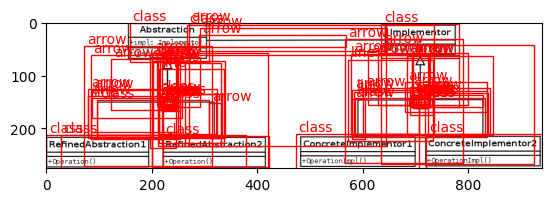




Filtered predictions after threshodling, i.e, accuracy > 0.25.
Total number of preictions:  13 



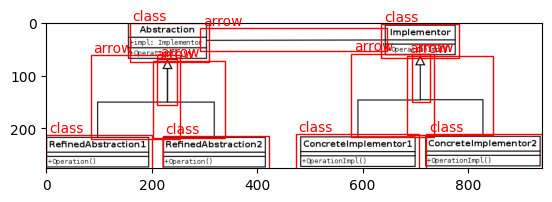



tensor([473.3984, 210.2192, 706.9916, 276.0000]) tensor(0.9963) class
tensor([  0.0000, 212.9323, 201.1969, 276.0000]) tensor(0.9957) class
tensor([221.2946, 214.3064, 421.8392, 276.0000]) tensor(0.9952) class
tensor([720.6130, 211.1419, 941.0001, 276.0000]) tensor(0.9920) class
tensor([158.0662,   0.0000, 308.7112,  74.1440]) tensor(0.9903) class
tensor([635.6945,   1.2610, 782.1647,  66.9423]) tensor(0.9819) class
tensor([692.9927,  59.5989, 727.0041, 149.0860]) tensor(0.8854) arrow
tensor([201.6947,  72.2301, 338.2031, 217.6361]) tensor(0.8841) arrow
tensor([210.0420,  69.0856, 246.9014, 154.7231]) tensor(0.8788) arrow
tensor([683.8920,  61.5759, 847.1186, 213.3140]) tensor(0.8769) arrow
tensor([578.7164,  57.8540, 734.8381, 216.3882]) tensor(0.8416) arrow
tensor([ 84.2206,  60.8981, 252.8074, 220.5891]) tensor(0.7748) arrow
tensor([291.7317,   9.5858, 646.2210,  52.6906]) tensor(0.7619) arrow


In [ ]:
import numpy as np
image=utils.read_image('/content/drive/My Drive/dataset_label/test/02_uml.png')
print("Image Shape: ", image.shape)
predictions = model.predict(image)
labels, boxes, scores = predictions
# Show all the predictions, without filtering
print("Initial predictions, w/o supression of overlapping bbox and accuracy filter")
print("Total number of preictions: ", len(boxes), "\n")
visualize.show_labeled_image(image, boxes, labels)
print("\n\n")

# Filter the predictions, based on the accuracy of predictions
#qui abbiamo la accuracy threshold , data dall'accuracy
acc_threshold = 0.70
confident_idx = [idx for idx, entry in enumerate(scores) if entry >= acc_threshold]

labels = [labels[idx] for idx in confident_idx]
boxes, scores = boxes[confident_idx], scores[confident_idx]

print("Filtered predictions after threshodling, i.e, accuracy > 0.25.")
print("Total number of preictions: ", len(boxes), "\n")
visualize.show_labeled_image(image, boxes, labels)
print("\n")
for category, pred, confidence in zip(labels, boxes, scores):
  print(pred, confidence, category)
# print(labels)



## Segmentation Test

In [ ]:
image=utils.read_image('/content/drive/My Drive/dataset_label/test/02_uml.png')


Filtered predictions after nonmax suppression of overlapping bboxes, IOU > 0.5
Total number of preictions:  13 



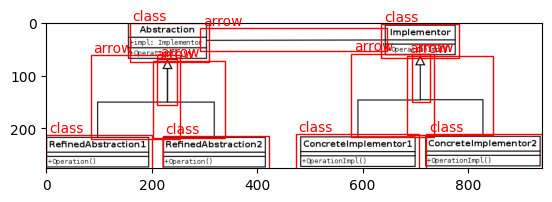



tensor([473.3984, 210.2192, 706.9916, 276.0000]) class tensor(0.9963)
tensor([  0.0000, 212.9323, 201.1969, 276.0000]) class tensor(0.9957)
tensor([221.2946, 214.3064, 421.8392, 276.0000]) class tensor(0.9952)
tensor([720.6130, 211.1419, 941.0001, 276.0000]) class tensor(0.9920)
tensor([158.0662,   0.0000, 308.7112,  74.1440]) class tensor(0.9903)
tensor([635.6945,   1.2610, 782.1647,  66.9423]) class tensor(0.9819)
tensor([692.9927,  59.5989, 727.0041, 149.0860]) arrow tensor(0.8854)
tensor([201.6947,  72.2301, 338.2031, 217.6361]) arrow tensor(0.8841)
tensor([210.0420,  69.0856, 246.9014, 154.7231]) arrow tensor(0.8788)
tensor([683.8920,  61.5759, 847.1186, 213.3140]) arrow tensor(0.8769)
tensor([578.7164,  57.8540, 734.8381, 216.3882]) arrow tensor(0.8416)
tensor([ 84.2206,  60.8981, 252.8074, 220.5891]) arrow tensor(0.7748)
tensor([291.7317,   9.5858, 646.2210,  52.6906]) arrow tensor(0.7619)


In [ ]:
'''
IDEA = dopo aver fatto la detection , sopprimiamo tutti i box con IOU maggiore di una soglia
iou = Area di intersezione (Intersection Area, IA): Questa è l'area in comune tra due bounding box.
 Un IoU uguale a 1 indica che i due bounding box si sovrappongono completamente, mentre un IoU pari a 0 indica che i due bounding box non hanno sovrapposizione.

 io voglio box che non si sovrappongono
'''
labels_map = { 'class': 1,
 'arrow': 2,
 'cross': 3,
 'line': 4
}
import torchvision
import torch
from pprint import pprint
#from torchmetrics.detection.map import MAP
# "ops.nms" returns the index (dec. ord of scores) of all bboxes that we
# should keep after performing the non-max suppression.
#
# Batched NMS does not supress overlapping boxes of different classes.
# Usually, best practice is to not supress boxes with different class
# Discards all overlapping boxes with IoU > iou_threshold
int_labels = torch.tensor(list(map(labels_map.get, labels)), dtype= torch.int)
keep = torchvision.ops.nms(boxes, scores, iou_threshold= 0.2)
filtered_boxes, filtered_scores = boxes[keep], scores[keep]
filtered_labels = [labels[idx] for idx in keep]
print("Filtered predictions after nonmax suppression of overlapping bboxes, IOU > 0.5")
print("Total number of preictions: ", len(filtered_boxes), "\n")
visualize.show_labeled_image(image, filtered_boxes, filtered_labels)
print("\n")
for fb, fl, fs in zip(filtered_boxes, filtered_labels, filtered_scores):
  print(fb, fl, fs)

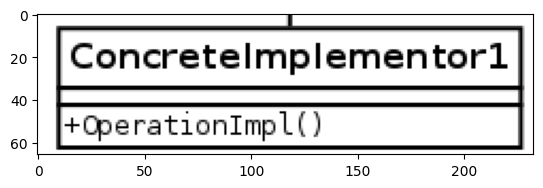

[]


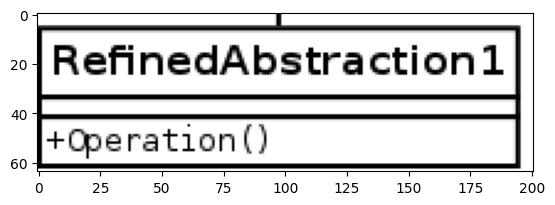

[]


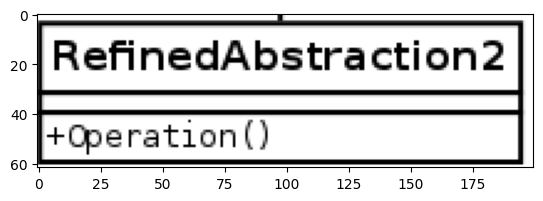

[]


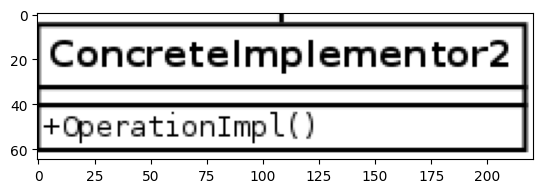

[]


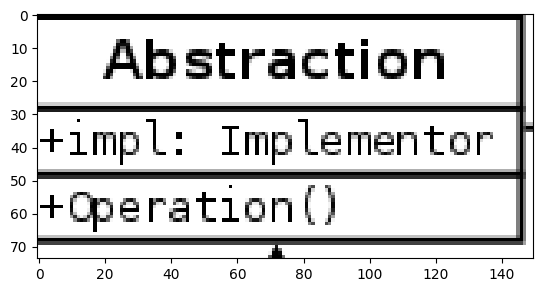

[]


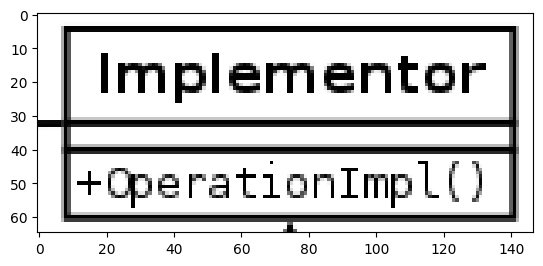

[]


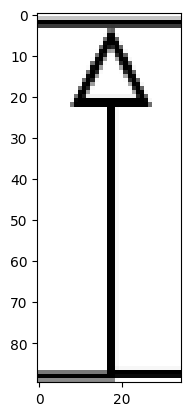

[]


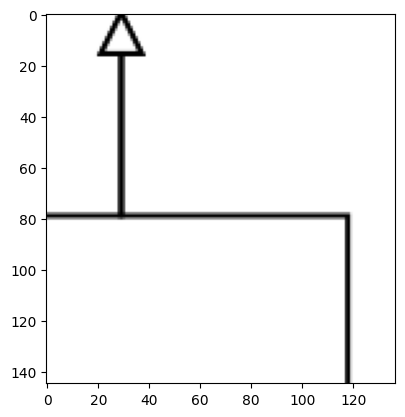

[]


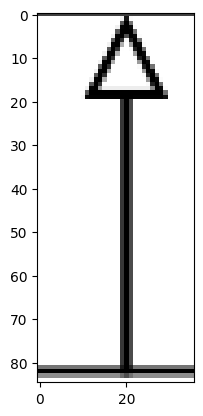

[]


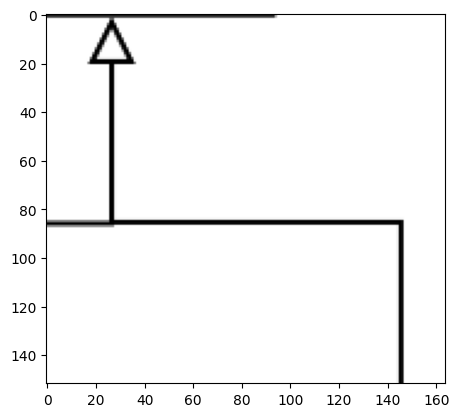

[]


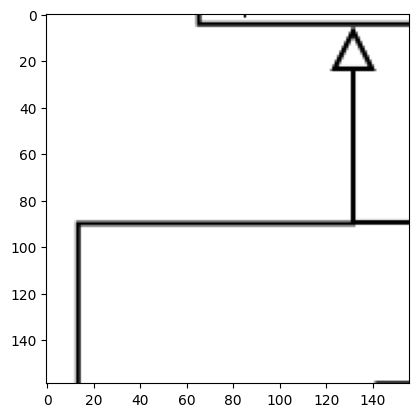

[]


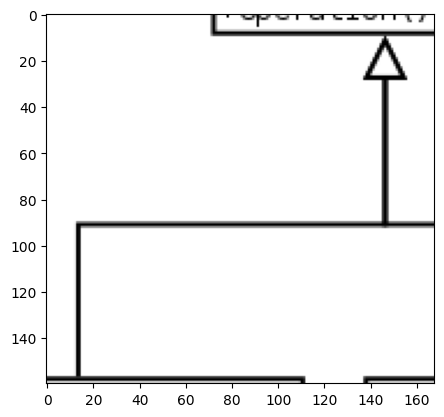

[]


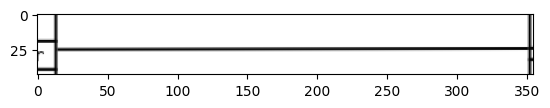

[]


In [ ]:
import cv2
import matplotlib.pyplot as plt
import time
def segment_uml_class(image, coordinates):
  xmin, ymin, xmax, ymax = map(int, coordinates)
  img = image.copy()[ymin: ymax, xmin: xmax]
  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  thresh = cv2.threshold(img_gray, 127, 255,  cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
  # Structuring element dimensions (width * height).
  # We take 7 % width for our mentioned bbox co-ordinate
  # Str El. Width can vastly differentiate the number of st.lines, we detect.
  # More zigzag lines means, width should be kept low.

  temp = int(0.5 * len(img[0]))
  str_element_width = int(0.07 * len(img[0]))
  str_element_height = 1

  # Detect horizontal lines
  # MORPH_OPEN work by first eroding the image(removing the small blobs)
  # and then dilation of the image(adding small blobs)

  horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (str_element_width, str_element_height))
  detect_horizontal = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations= 1)
  cnts = cv2.findContours(detect_horizontal, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  cnts = cnts[0] if len(cnts) == 2 else cnts[1]

  # 'cnts' is a numpy.ndarray with shape N * 1 * 2
  # -> where N is the number of points
  # We need to merge the contours that is near each other in
  # vertical axis.
  # We represent the vertical threshold, as difference between 2
  45
  # contours, expressed a percentage

  vertical_threshold = .3
  count = 0
  reduced_cnts = []



  imgplot = plt.imshow(img)
  plt.show()

  print(reduced_cnts)
  return reduced_cnts

bbox_segments = {}
captured_reln = []


for fb, fl in zip(filtered_boxes, filtered_labels):
    if fl == 'class':
      # fb has data in order [xmin, ymin, xmax, ymax]
      key = (int(fb[0]), int(fb[2]))
      y_diff = int(fb[1])
      # Rescale the y-cordinates to the original image co-ordinates
      y_pts = list(map(lambda x : x + y_diff, segment_uml_class(image, fb)))
      class_segment = []
      for i in range(1, len(y_pts)):
        class_segment.append([y_pts[i-1], y_pts[i]])
        bbox_segments[key] = class_segment
    else:
      captured_reln.append(fl)

for fb, fl in zip(filtered_boxes, filtered_labels):
    if fl == 'arrow':
      # fb has data in order [xmin, ymin, xmax, ymax]
      key = (int(fb[0]), int(fb[2]))
      y_diff = int(fb[1])
      # Rescale the y-cordinates to the original image co-ordinates
      y_pts = list(map(lambda x : x + y_diff, segment_uml_class(image, fb)))
      class_segment = []
      for i in range(1, len(y_pts)):
        class_segment.append([y_pts[i-1], y_pts[i]])
        bbox_segments[key] = class_segment
    else:
      captured_reln.append(fl)



# Catch Exception for IndexError because, contours may not have length 4
# for every detected class, and classes that are falsely identified
# Plot all the class segments for each of the detected classes in image.
for k, v in bbox_segments.items():
    fig, axs = plt.subplots(1, 3)
    try:
      for i in range(len(v)):
        axs[i].imshow(image[v[i][1]: v[i][0], k[0]: k[1]])
    except IndexError:
      print("Exception occured in parsing UML class. \n \
      Reasons could be, \n \
      [wrong identification,\n \
      threshold for merging contours,\n \
      missing attributes or methods for class]\n \
      ")
      pass

# Feature Extraction

## Diagram Extraction



*   histogram
*   ratio



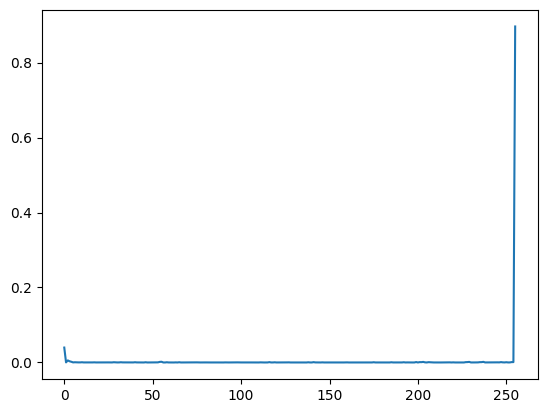

Normalized Histogram 
[[3.97857660e-02]
 [2.65674814e-04]
 [5.51756534e-03]
 [3.19964885e-03]
 [1.88282586e-03]
 [2.23320858e-04]
 [6.08356821e-04]
 [3.38831647e-04]
 [2.11769779e-04]
 [2.19470499e-04]
 [5.92955382e-04]
 [1.30912227e-04]
 [1.11660429e-04]
 [1.07810069e-04]
 [2.69525174e-05]
 [3.08028770e-04]
 [1.61715104e-04]
 [3.69634524e-04]
 [9.62589906e-05]
 [1.38612946e-04]
 [2.46423016e-04]
 [1.19361148e-04]
 [1.96368341e-04]
 [2.11769779e-04]
 [2.04069060e-04]
 [2.04069060e-04]
 [1.11660429e-04]
 [1.00109350e-04]
 [6.46860417e-04]
 [2.57974095e-04]
 [9.62589906e-05]
 [1.61715104e-04]
 [6.31458978e-04]
 [2.34871937e-04]
 [1.77116543e-04]
 [5.39050347e-05]
 [3.34981287e-04]
 [6.93064732e-05]
 [8.85582713e-05]
 [1.15510789e-04]
 [6.43010057e-04]
 [1.65565464e-04]
 [7.31568328e-05]
 [4.62043155e-05]
 [6.16057540e-05]
 [2.31021577e-05]
 [5.92955382e-04]
 [2.31021577e-05]
 [6.93064732e-05]
 [3.85035962e-05]
 [2.65674814e-04]
 [1.42463306e-04]
 [3.42682006e-04]
 [3.15729489e-04]
 [1.55

In [ ]:
import cv2
import matplotlib.pyplot as plt

class diagram_feature_extractor:
    def __init__(self, image_path):
        self.image_path = image_path

    def get_color_histogram(self):
        # Leggi l'immagine in scala di grigi utilizzando OpenCV
        img = cv2.imread(self.image_path, 0)

        # Calcola l'istogramma dei valori di intensità (grigi) nell'immagine
        histogram = cv2.calcHist([img], [0], None, [256], [0, 256])

        # Normalizza l'istogramma dividendo per il numero totale di pixel nell'immagine
        total_pixels = img.shape[0] * img.shape[1]
        histogram_normalized = histogram / total_pixels

        return histogram_normalized

    def show_histogram(self):
        histogram = self.get_color_histogram()
        plt.plot(histogram)
        plt.show()

    def aspect_ratio(self):
        img = cv2.imread(self.image_path, 0)
        height, width = img.shape
        aspect_ratio = width/height
        return aspect_ratio

# Percorso dell'immagine
image_path = "/content/drive/My Drive/dataset_label/test/02_uml.png"

# Creazione dell'oggetto histogram__feature_extractor
diagram_feature_extractor = diagram_feature_extractor(image_path)
#chiamata al metodo
diagram_feature_extractor.show_histogram()
aspect_ratio = diagram_feature_extractor.aspect_ratio()
print("Normalized Histogram ")
print(diagram_feature_extractor.get_color_histogram())
print("F12 — Aspect ratio")
print(aspect_ratio)


## Class extraction



*   class coverage
*   average class area
*   aspect ratio
*   #class
*   std_deviation class size
*   class proimy
*   Rectangle distribution



In [ ]:
'''
iou_threshold
dopo aver fatto la detection , sopprimiamo tutti i box con IOU maggiore di una soglia
iou = Area di intersezione (Intersection Area, IA): Questa è l'area in comune tra due bounding box.
Un IoU uguale a 1 indica che i due bounding box si sovrappongono completamente,
mentre un IoU pari a 0 indica che i due bounding box non hanno sovrapposizione.

'''
import math
from statistics import mean
import numpy as np
import torchvision
import torch
from pprint import pprint

class class_feature_extractor:
    def __init__(self, image ,acc_threshold,  iou_threshold , desired_class):
        self.image = image
        self.acc_threshold = acc_threshold #acc_threshold = 0.70
        self.iou_threshold = iou_threshold #iou_threshold = 0.2
        self.desired_class = desired_class #desired_class = 'class'
        self.filtered_boxes,self.filtered_labels = self.compute_class_filter()

    #step1
    def compute_class_accuracy(self):
      print("Image Shape: ", image.shape)
      predictions = model.predict(image)
      labels, boxes, scores = predictions

      # Filter the predictions to keep only the "cross" class
      desired_idx = [idx for idx, (label, score) in enumerate(zip(labels, scores)) if score >= self.acc_threshold and label == self.desired_class]

      labels = [labels[idx] for idx in desired_idx]
      boxes, scores = boxes[desired_idx], scores[desired_idx]

      print("Filtered predictions after thresholding, keeping only the 'class' class.")
      print("Total number of predictions: ", len(boxes), "\n")
      visualize.show_labeled_image(image, boxes, labels)
      print("\n")

      # Count the elements for the "cross" class
      elements_per_class = {self.desired_class: len(boxes)}
      print("Number of elements per class:")
      print(f"{self.desired_class}: {elements_per_class[self.desired_class]}")
      print("\n")
      for category, pred, confidence in zip(labels, boxes, scores):
        print(pred, confidence, category)
      return labels, boxes, scores

    #step2
    def compute_class_filter(self):
      labels, boxes, scores = self.compute_class_accuracy()
      labels_map = { 'class': 1,
      'arrow': 2,
      'cross': 3,
      'line': 4
      }
      int_labels = torch.tensor(list(map(labels_map.get, labels)), dtype= torch.int)
      keep = torchvision.ops.nms(boxes, scores, iou_threshold)
      filtered_boxes, filtered_scores = boxes[keep], scores[keep]
      filtered_labels = [labels[idx] for idx in keep]
      print("Total number of preictions: ", len(filtered_boxes), "\n")
      visualize.show_labeled_image(image, filtered_boxes, filtered_labels)
      print("\n")
      for fb, fl, fs in zip(filtered_boxes, filtered_labels, filtered_scores):
        print(fb, fl, fs)

      return filtered_boxes,filtered_labels



    def segment_uml_class(self, coordinates):
        xmin, ymin, xmax, ymax = map(int, coordinates)
        img = self.image.copy()[ymin: ymax, xmin: xmax]
        height, width, channels = img.shape
        area = height * width
        return area

    #compute and create a list with all class areas
    def compute_areas(self):
        i = 0
        list_areas=[]
        height, width, channels = self.image.shape
        areaImage = height * width
        captured_reln = []
        for fb, fl in zip(self.filtered_boxes, self.filtered_labels):
            if fl == 'class':
                i += 1
                list_areas.append(self.segment_uml_class(fb))
            else:
                captured_reln.append(fl)

        return list_areas

    #ratio between class Area and total imae Area
    def calculate_coverage(self):
        areaTot = 0
        i = 0
        height, width, channels = self.image.shape
        areaImage = height * width
        captured_reln = []
        list_areas = self.compute_areas()
        for area in list_areas:
          areaTot += area

        coverageArea = areaTot / areaImage
        result = round(coverageArea, 3)
        return result
    import math

    def calculate_std_deviation(self):
        list_areas = self.compute_areas()
        n = len(list_areas)
        mean = sum(list_areas) / n
        variance = sum((x - mean) ** 2 for x in list_areas) / n
        std_deviation = math.sqrt(variance)
        percentage_std_deviation = (std_deviation / mean) * 100
        percentage_std_deviation = round(percentage_std_deviation,3)
        return percentage_std_deviation

    def calculate_n_class(self):
      list_areas = self.compute_areas()
      return len(list_areas)

    #voglio normalizzare il valore della media delle aree rispetto alla grandezza dell'immagine
    def calculate_avg_area(self):
        list_areas = self.compute_areas()
        mean_area = mean(list_areas)  # Rinomina la variabile 'mean' in 'mean_area'
        height, width, channels = self.image.shape
        areaImage = height * width
        normalized_area = mean_area / areaImage
        normalized_area = round(normalized_area,3)
        return normalized_area

    def calculate_aspect_ratio(self):
      height, width, channels = self.image.shape
      aspect_ratio = width/height
      aspect_ratio = round(aspect_ratio,2)
      return aspect_ratio



    def show_class(self ):
        for fb, fl in zip(self.filtered_boxes,self.filtered_labels):
          if fl == 'class':
            xmin, ymin, xmax, ymax = map(int, fb)
            img = self.image.copy()[ymin: ymax, xmin: xmax]
            height, width, channels = img.shape
            area = height * width
            imgplot = plt.imshow(img)
            plt.show()

    def capture_coordinates(self):
      captured_reln = []
      captured_coordinates = []  # Lista per salvare le tuple ottenute

      for fb, fl in zip(self.filtered_boxes, self.filtered_labels):
          if fl == 'class':
              xmin, ymin, xmax, ymax = map(int, fb)
              captured_coordinates.append((xmin, ymin, xmax, ymax))  # Aggiungi la tupla alla lista
          else:
              captured_reln.append(fl)
      return captured_coordinates


    def compute_center_dist(self , rect1, rect2):
      # Calcola il centro del primo rettangolo
      x1 = (rect1[0] + rect1[2]) / 2
      y1 = (rect1[1] + rect1[3]) / 2

      # Calcola il centro del secondo rettangolo
      x2 = (rect2[0] + rect2[2]) / 2
      y2 = (rect2[1] + rect2[3]) / 2

      # Calcola la distanza euclidea tra i centri dei rettangoli
      dist = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

      return dist

    def calculate_proximity(self):
        captured_coordinates = self.capture_coordinates()
        total_dist = 0
        n_rect = len(captured_coordinates)
        # itera su tutte le possibili coppie uniche di rettangoli presenti nella lista captured_coordinates
        # calcolare ogni distanza tra i centri dei rettangoli solo una volta
        for i in range(n_rect):
            for j in range(i + 1, n_rect):
                dist = self.compute_center_dist(captured_coordinates[i], captured_coordinates[j])
                total_dist += dist

        if n_rect > 1:
            # consideriamo le combinazioni
            # rappresenta il numero di modi in cui possiamo scegliere 2 rettangoli da numero_rettangoli senza ripetizioni e senza considerare l'ordine
            proximity = total_dist / (n_rect * (n_rect - 1) / 2)
        else:
            proximity = 0
        proximity = round(proximity,3)
        return proximity



    def calculate_rectangle_area(self , xmin, ymin, xmax, ymax):
      return (xmax - xmin) * (ymax - ymin)

    #compute the area covered by all rect in a specific quadrant
    def calculate_section_area(self , quadrant, rectangles):
      x_min_section, y_min_section, x_max_section, y_max_section = quadrant
      quadrant_area = self.calculate_rectangle_area(x_min_section, y_min_section, x_max_section, y_max_section)
      section_area = 0
      for rectangle in rectangles:
          x_min, y_min, x_max, y_max = rectangle

          # Calculate the intersection area between the rectangle and the section
          x_intersection_min = max(x_min, x_min_section)
          y_intersection_min = max(y_min, y_min_section)
          x_intersection_max = min(x_max, x_max_section)
          y_intersection_max = min(y_max, y_max_section)

          # Check if there is an intersection between the rectangle and the section
          if x_intersection_min < x_intersection_max and y_intersection_min < y_intersection_max:
              section_area += self.calculate_rectangle_area(x_intersection_min, y_intersection_min, x_intersection_max, y_intersection_max)

      coverage_percent = (section_area / quadrant_area) * 100
      coverage_percent = round(coverage_percent,3)
      return coverage_percent

    #all rect and all quadrants are taken into account , then is computed the variance
    def calculate_class_distribution(self):
        image_height, image_width, channels = self.image.shape
        rectangles = self.capture_coordinates()
        # Calculate the coordinates of the four quadrants
        center_x = image_width // 2
        center_y = image_height // 2

        quadrants = [
            (0, 0, center_x, center_y),
            (center_x, 0, image_width, center_y),
            (0, center_y, center_x, image_height),
            (center_x, center_y, image_width, image_height)
        ]

        # Calculate the total area of the image
        total_image_area = self.calculate_rectangle_area(0, 0, image_width, image_height)

        # Calculate the area covered by rectangles for each quadrant
        covered_areas = [self.calculate_section_area(quadrant, rectangles) for quadrant in quadrants]

        # Calculate the variance of the covered areas
        variance = np.var(covered_areas)
        variance = round(variance,3)
        #mean = np.mean(covered_areas)
        #normalized_variance = variance / mean
        #print(mean)
        #print(covered_areas)
        #variance = round(variance , 3)
        #print(variance)

        return variance


Image Shape:  (276, 941, 3)
Filtered predictions after thresholding, keeping only the 'class' class.
Total number of predictions:  6 



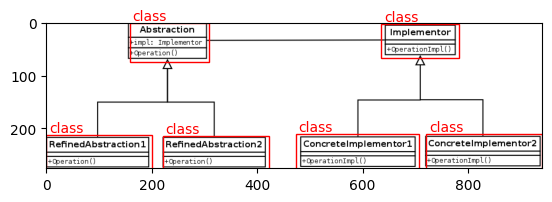



Number of elements per class:
class: 6


tensor([473.3984, 210.2192, 706.9916, 276.0000]) tensor(0.9963) class
tensor([  0.0000, 212.9323, 201.1969, 276.0000]) tensor(0.9957) class
tensor([221.2946, 214.3064, 421.8392, 276.0000]) tensor(0.9952) class
tensor([720.6130, 211.1419, 941.0001, 276.0000]) tensor(0.9920) class
tensor([158.0662,   0.0000, 308.7112,  74.1440]) tensor(0.9903) class
tensor([635.6945,   1.2610, 782.1647,  66.9423]) tensor(0.9819) class
Total number of preictions:  6 



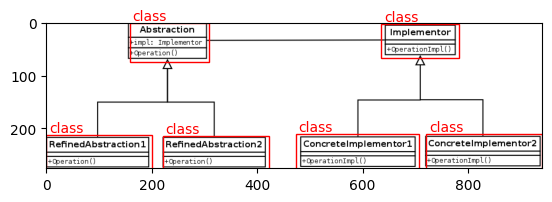



tensor([473.3984, 210.2192, 706.9916, 276.0000]) class tensor(0.9963)
tensor([  0.0000, 212.9323, 201.1969, 276.0000]) class tensor(0.9957)
tensor([221.2946, 214.3064, 421.8392, 276.0000]) class tensor(0.9952)
tensor([720.6130, 211.1419, 941.0001, 276.0000]) class tensor(0.9920)
tensor([158.0662,   0.0000, 308.7112,  74.1440]) class tensor(0.9903)
tensor([635.6945,   1.2610, 782.1647,  66.9423]) class tensor(0.9819)
F11 — Rectangle coverage normalized 
0.291
F12 — Aspect ratio
3.41
F16 — Rectangle size variation normalized
15.344
F17 — Number of class. 
6
F15 — Rectangle size normalized
0.049
F14 — Rectangle proximity
401.216
F13 — Rectangle distribution
181.409


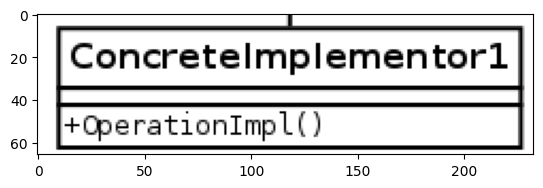

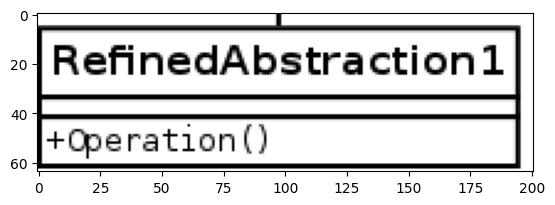

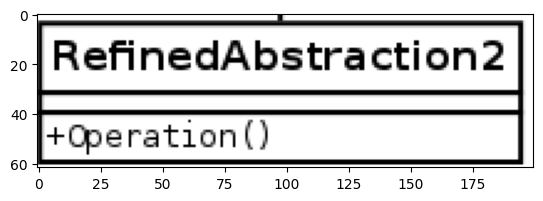

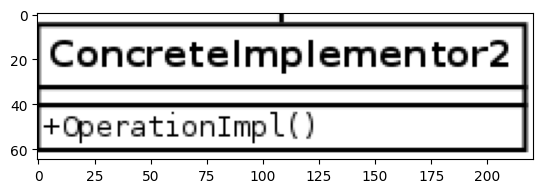

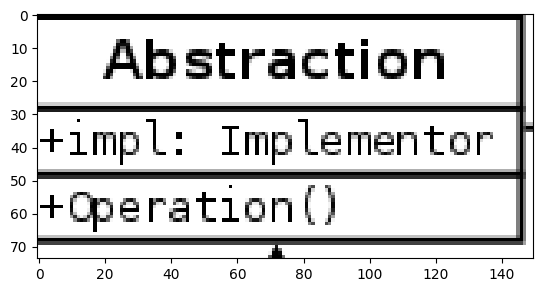

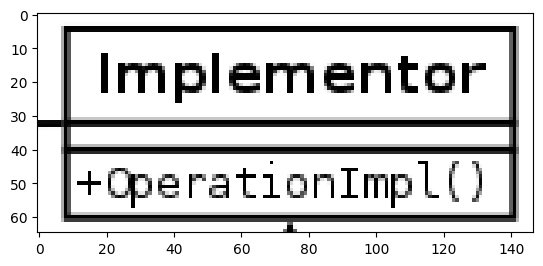

In [ ]:
image=utils.read_image('/content/drive/My Drive/dataset_label/test/02_uml.png')

# Creazione dell'oggetto UMLClassSegmenter
acc_threshold = 0.7
iou_threshold=0.2
desired_class = 'class'
class_extractor = class_feature_extractor(image,acc_threshold,iou_threshold,desired_class)



# Stampa del risultato
print("F11 — Rectangle coverage normalized ")
print(class_extractor.calculate_coverage())
print("F12 — Aspect ratio")
print(class_extractor.calculate_aspect_ratio())
print("F16 — Rectangle size variation normalized")
print(class_extractor.calculate_std_deviation())
print("F17 — Number of class. ")
print(class_extractor.calculate_n_class())
print("F15 — Rectangle size normalized")
print(class_extractor.calculate_avg_area())
print("F14 — Rectangle proximity")
print(class_extractor.calculate_proximity())
print("F13 — Rectangle distribution")
print(class_extractor.calculate_class_distribution())

#class_extractor.show_class()

## Cross Line

In [ ]:
import numpy as np
import torchvision
import torch
from pprint import pprint

class class_cross_extraction:
  def __init__(self, image ,acc_threshold,  iou_threshold , desired_class):
    self.image = image
    self.acc_threshold = acc_threshold
    self.iou_threshold = iou_threshold
    self.desired_class = desired_class
    self.filtered_boxes,self.filtered_labels = self.compute_cross_filter()

  #step1
  def compute_cross_accuracy(self):
    print("Image Shape: ", image.shape)
    predictions = model.predict(image)
    labels, boxes, scores = predictions

    # Filter the predictions to keep only the "cross" class
    desired_idx = [idx for idx, (label, score) in enumerate(zip(labels, scores)) if score >= self.acc_threshold and label == self.desired_class]

    labels = [labels[idx] for idx in desired_idx]
    boxes, scores = boxes[desired_idx], scores[desired_idx]

    print("Filtered predictions after thresholding, keeping only the 'cross' class.")
    print("Total number of predictions: ", len(boxes), "\n")
    visualize.show_labeled_image(image, boxes, labels)
    print("\n")

    # Count the elements for the "cross" class
    elements_per_class = {self.desired_class: len(boxes)}
    print("Number of elements per class:")
    print(f"{self.desired_class}: {elements_per_class[self.desired_class]}")
    print("\n")
    for category, pred, confidence in zip(labels, boxes, scores):
      print(pred, confidence, category)
    return labels, boxes, scores

  #step2
  def compute_cross_filter(self):
    labels_map = { 'class': 1,
    'arrow': 2,
    'cross': 3,
    'line': 4
    }
    labels, boxes, scores = self.compute_cross_accuracy()
    int_labels = torch.tensor(list(map(labels_map.get, labels)), dtype=torch.int)
    keep = torchvision.ops.nms(boxes, scores, iou_threshold)
    filtered_boxes, filtered_scores = boxes[keep], scores[keep]
    filtered_labels = [labels[idx] for idx in keep]

    print("Total number of predictions: ", len(filtered_boxes), "\n")
    visualize.show_labeled_image(image, filtered_boxes, filtered_labels)
    print("\n")

    # Find the index of the largest bounding box
    largest_box_idx = torch.argmax((filtered_boxes[:, 2] - filtered_boxes[:, 0]) * (filtered_boxes[:, 3] - filtered_boxes[:, 1]))

    # Keep only the largest bounding box
    filtered_boxes = filtered_boxes[largest_box_idx].unsqueeze(0)
    filtered_labels = [filtered_labels[largest_box_idx]]
    filtered_scores = [filtered_scores[largest_box_idx]]

    print("After keeping only the largest bounding box:")
    print("Largest bounding box: ", filtered_boxes[0], filtered_labels[0], filtered_scores[0])

    # Show the largest bounding box
    visualize.show_labeled_image(image, filtered_boxes, filtered_labels)
    return filtered_boxes,filtered_labels

  #step 3
  def show_cross(self):
    filtered_boxes,filtered_labels = self.compute_cross_filter()
    for fb, fl in zip(filtered_boxes,filtered_labels):
      if fl == 'cross':
        xmin, ymin, xmax, ymax = map(int, fb)
        img = image.copy()[ymin: ymax, xmin: xmax]
        height, width, channels = img.shape
        area = height * width
        imgplot = plt.imshow(img)
        plt.show()

  def compute_n_cross(self):
    #filtered_boxes,filtered_labels = self.compute_cross_filter()
    count = 0
    for fb, fl in zip(self.filtered_boxes,self.filtered_labels):
      if fl == 'cross':
        count = count +1
    return count




Image Shape:  (913, 1051, 3)
Filtered predictions after thresholding, keeping only the 'cross' class.
Total number of predictions:  4 



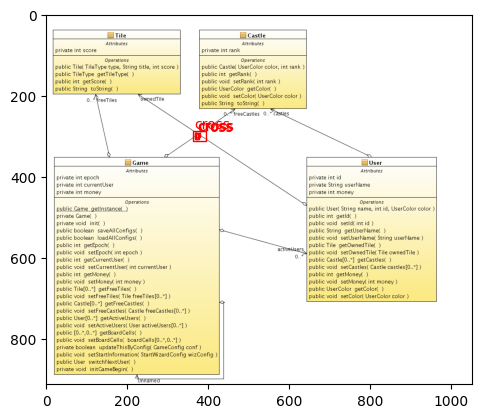



Number of elements per class:
cross: 4


tensor([367.0215, 291.2862, 373.8803, 305.8543]) tensor(0.1368) cross
tensor([361.4274, 286.0225, 393.6838, 312.6539]) tensor(0.1226) cross
tensor([370.7823, 291.5108, 378.2072, 306.6817]) tensor(0.1204) cross
tensor([367.5239, 291.9123, 380.6264, 302.2781]) tensor(0.1166) cross
Total number of predictions:  3 



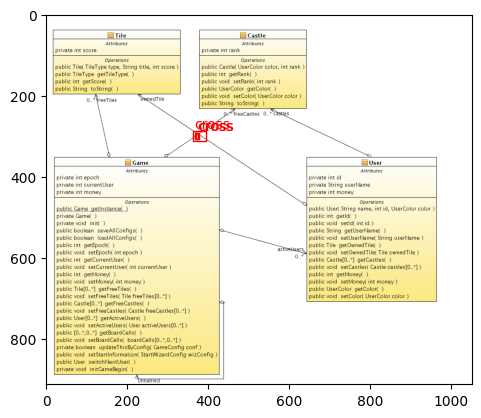



After keeping only the largest bounding box:
Largest bounding box:  tensor([361.4274, 286.0225, 393.6838, 312.6539]) cross tensor(0.1226)


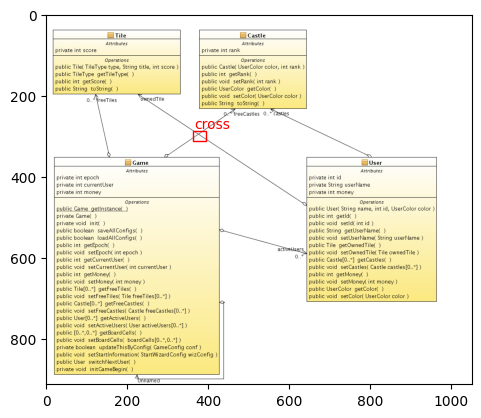

F1 — Line crossings


1

In [ ]:
image=utils.read_image('/content/drive/My Drive/dataset_label/test/ItemsDiagram.png')
#STEP BY STEP COMPUTATION
acc_threshold = 0.1
iou_threshold=0.3
desired_class = 'cross'
cross_extraction = class_cross_extraction(image,acc_threshold,iou_threshold,desired_class)
#cross_extraction.compute_cross_accuracy()
#cross_extraction.compute_cross_filter()
#cross_extraction.show_cross()
#MEASURE
print("F1 — Line crossings")
cross_extraction.compute_n_cross()

## Arrow Feature Naive

In [ ]:
'''
iou_threshold
dopo aver fatto la detection , sopprimiamo tutti i box con IOU maggiore di una soglia
iou = Area di intersezione (Intersection Area, IA): Questa è l'area in comune tra due bounding box.
Un IoU uguale a 1 indica che i due bounding box si sovrappongono completamente,
mentre un IoU pari a 0 indica che i due bounding box non hanno sovrapposizione.
'''
import math
from statistics import mean
import numpy as np
import torchvision
import torch
from pprint import pprint
import cv2
import numpy as np
import matplotlib.pyplot as plt
import statistics
from scipy.spatial import distance
import math
from statistics import mean


from scipy.spatial import distance

class arrow_feature_extractor_naive:
    def __init__(self, image ,acc_threshold,  iou_threshold , desired_class):
        self.image = image
        self.acc_threshold = acc_threshold #acc_threshold = 0.70
        self.iou_threshold = iou_threshold #iou_threshold = 0.2
        self.desired_class = desired_class #desired_class = 'arrow'
        self.filtered_boxes,self.filtered_labels = self.compute_class_filter()
        self.list_lenght = self.find_lenght()

    #step1
    def compute_class_accuracy(self):
      print("Image Shape: ", image.shape)
      predictions = model.predict(image)
      labels, boxes, scores = predictions

      # Filter the predictions to keep only the "cross" class
      desired_idx = [idx for idx, (label, score) in enumerate(zip(labels, scores)) if score >= self.acc_threshold and label == self.desired_class]

      labels = [labels[idx] for idx in desired_idx]
      boxes, scores = boxes[desired_idx], scores[desired_idx]

      print("Filtered predictions after thresholding, keeping only the 'class' class.")
      print("Total number of predictions: ", len(boxes), "\n")
      visualize.show_labeled_image(image, boxes, labels)
      print("\n")

      # Count the elements for the "cross" class
      elements_per_class = {self.desired_class: len(boxes)}
      print("Number of elements per class:")
      print(f"{self.desired_class}: {elements_per_class[self.desired_class]}")
      print("\n")
      for category, pred, confidence in zip(labels, boxes, scores):
        print(pred, confidence, category)
      return labels, boxes, scores

    #step2
    def compute_class_filter(self):
      labels, boxes, scores = self.compute_class_accuracy()
      labels_map = { 'class': 1,
      'arrow': 2,
      'cross': 3,
      'line': 4
      }
      int_labels = torch.tensor(list(map(labels_map.get, labels)), dtype= torch.int)
      keep = torchvision.ops.nms(boxes, scores, iou_threshold)
      filtered_boxes, filtered_scores = boxes[keep], scores[keep]
      filtered_labels = [labels[idx] for idx in keep]
      print("Total number of preictions: ", len(filtered_boxes), "\n")
      visualize.show_labeled_image(image, filtered_boxes, filtered_labels)
      print("\n")
      for fb, fl, fs in zip(filtered_boxes, filtered_labels, filtered_scores):
        print(fb, fl, fs)

      return filtered_boxes,filtered_labels



    def segment_uml_class(self, coordinates):
        xmin, ymin, xmax, ymax = map(int, coordinates)
        img = self.image.copy()[ymin: ymax, xmin: xmax]
        height, width, channels = img.shape
        area = height * width
        return area


    def show_arrow(self ):
        for fb, fl in zip(self.filtered_boxes,self.filtered_labels):
          if fl == 'arrow':
            xmin, ymin, xmax, ymax = map(int, fb)
            img = self.image.copy()[ymin: ymax, xmin: xmax]
            imgplot = plt.imshow(img)
            plt.show()


    def get_arrow(self ):
        images_to_return = []  # Lista per salvare le immagini elaborate
        for fb, fl in zip(self.filtered_boxes,self.filtered_labels):
          if fl == 'arrow':
            xmin, ymin, xmax, ymax = map(int, fb)
            img = self.image.copy()[ymin: ymax, xmin: xmax]
            images_to_return.append(img)  # Aggiungi l'immagine elaborata alla lista
        return images_to_return

    def compute_n_arrow(self):
        count=0
        for fb, fl in zip(self.filtered_boxes,self.filtered_labels):
          if fl == 'arrow':
            count+=1
        return count


    def enhance_lines_between_points(self , img, far_point_1, far_point_2):
        # Converti l'immagine in scala di grigi
        if len(img.shape) > 2:
            gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        else:
            gray_img = img.copy()

        # Applica una trasformazione di contrasto (es. equalizzazione dell'istogramma)
        equalized_img = cv2.equalizeHist(gray_img)

        # Trova i bordi delle linee utilizzando l'algoritmo di Canny
        edges = cv2.Canny(equalized_img, threshold1=30, threshold2=100)

        # Crea un'immagine vuota con lo stesso formato dell'immagine originale
        highlighted_img = np.copy(img)

        # Imposta il colore delle linee evidenziate in verde (puoi personalizzare il colore)
        line_color = (0, 255, 0)

        # Evidenzia solo i bordi trovati sulle linee nell'area definita da far_point_1 e far_point_2
        mask = np.zeros_like(edges)
        mask[min(far_point_1[0], far_point_2[0]): max(far_point_1[0], far_point_2[0]),
            min(far_point_1[1], far_point_2[1]): max(far_point_1[1], far_point_2[1])] = 255

        # Converti l'immagine in scala di grigi in un'immagine a colori
        highlighted_img = cv2.merge([highlighted_img, highlighted_img, highlighted_img])

        # Assegna il colore alle linee nell'area definita da far_point_1 e far_point_2
        highlighted_img[np.logical_and(edges != 0, mask != 0)] = line_color

        return highlighted_img

    def find_lenght(self):
      images = self.get_arrow()
      list_lenght = []
      for img in images:
          # Convert the image to grayscale if it's not already
          if len(img.shape) > 2:
              img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

          _, img = cv2.threshold(img, 10, 255, cv2.THRESH_BINARY_INV)
          labels, stats = cv2.connectedComponentsWithStats(img, 8)[1:3]

          max_arrow_length = 0
          max_arrow_thickness = 0
          max_arrow_angle = 0
          max_arrow_points = None

          for label in np.unique(labels)[1:]:
              arrow = labels == label
              indices = np.transpose(np.nonzero(arrow))  # y, x

              dist = distance.cdist(indices, indices, 'euclidean')
              far_points_index = np.unravel_index(np.argmax(dist), dist.shape)  # y, x

              far_point_1 = indices[far_points_index[0], :]  # y, x
              far_point_2 = indices[far_points_index[1], :]  # y, x

              # Length
              arrow_length = distance.cdist(far_point_1.reshape(1, 2), far_point_2.reshape(1, 2), 'euclidean')[0][0]

              if arrow_length > max_arrow_length:
                  max_arrow_length = arrow_length
                  max_arrow_points = (far_point_1, far_point_2)

          max_arrow_length = round(max_arrow_length,3)

          list_lenght.append(max_arrow_length)
          #uncomment to see all graph
          '''
          print(f"Max Length: {max_arrow_length}\n")
          # Evidenzia le linee nell'area definita da far_point_1 e far_point_2
          highlighted_img = self.enhance_lines_between_points(img, max_arrow_points[0], max_arrow_points[1])

          # Visualizza l'immagine risultante
          plt.imshow(highlighted_img)
          plt.plot([max_arrow_points[0][1], max_arrow_points[1][1]], [max_arrow_points[0][0], max_arrow_points[1][0]], color='orange')
          plt.axis('off')
          plt.show()
          '''
      return list_lenght

    def compute_avg_arrow_lenght(self):
        if not self.list_lenght:
            return 0  # Return 0 for an empty list to avoid division by zero

        average = mean(self.list_lenght)
        return average

    def compute_max_arrow_lenght(self):
        if not self.list_lenght:
            return 0  # Return 0 for an empty list to avoid division by zero

        max_value = max(self.list_lenght)
        return max_value

    def compute_min_arrow_lenght(self):
        if not self.list_lenght:
            return 0  # Return 0 for an empty list to avoid division by zero

        min_value = min(self.list_lenght)
        return min_value


    def compute_std_deviation(self):
        if len(self.list_lenght) < 2:
            return 0  # Return 0 for lists with fewer than two elements

        mean_value = statistics.mean(self.list_lenght)
        standard_deviation = statistics.stdev(self.list_lenght)
        standard_deviation_percentage = (standard_deviation / mean_value) * 100
        return standard_deviation_percentage


Image Shape:  (276, 941, 3)
Filtered predictions after thresholding, keeping only the 'class' class.
Total number of predictions:  7 



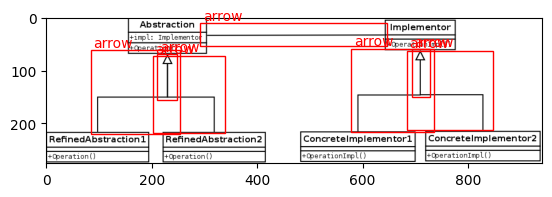



Number of elements per class:
arrow: 7


tensor([692.9927,  59.5989, 727.0041, 149.0860]) tensor(0.8854) arrow
tensor([201.6947,  72.2301, 338.2031, 217.6361]) tensor(0.8841) arrow
tensor([210.0420,  69.0856, 246.9014, 154.7231]) tensor(0.8788) arrow
tensor([683.8920,  61.5759, 847.1186, 213.3140]) tensor(0.8769) arrow
tensor([578.7164,  57.8540, 734.8381, 216.3882]) tensor(0.8416) arrow
tensor([ 84.2206,  60.8981, 252.8074, 220.5891]) tensor(0.7748) arrow
tensor([291.7317,   9.5858, 646.2210,  52.6906]) tensor(0.7619) arrow
Total number of preictions:  7 



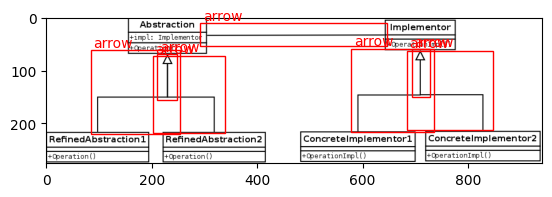



tensor([692.9927,  59.5989, 727.0041, 149.0860]) arrow tensor(0.8854)
tensor([201.6947,  72.2301, 338.2031, 217.6361]) arrow tensor(0.8841)
tensor([210.0420,  69.0856, 246.9014, 154.7231]) arrow tensor(0.8788)
tensor([683.8920,  61.5759, 847.1186, 213.3140]) arrow tensor(0.8769)
tensor([578.7164,  57.8540, 734.8381, 216.3882]) arrow tensor(0.8416)
tensor([ 84.2206,  60.8981, 252.8074, 220.5891]) arrow tensor(0.7748)
tensor([291.7317,   9.5858, 646.2210,  52.6906]) arrow tensor(0.7619)
F18 — Number of lines.
7
F7 — Average line length
178.7322857142857
F8 — Line length variation
47.47438712442534
F9 — Longest line.
335.001
F10 — Shortest line.
82.462
ALL LENGHT
[84.929, 169.812, 82.462, 189.908, 192.255, 196.759, 335.001]


In [ ]:
image=utils.read_image('/content/drive/My Drive/dataset_label/test/02_uml.png')

# Creazione dell'oggetto UMLClassSegmenter
acc_threshold = 0.7
iou_threshold=0.2
desired_class = 'arrow'
arrow_extractor = arrow_feature_extractor_naive(image,acc_threshold,iou_threshold,desired_class)

#arrow_extractor.show_class()
print("F18 — Number of lines.")
print(arrow_extractor.compute_n_arrow())
print("F7 — Average line length")
print(arrow_extractor.compute_avg_arrow_lenght())
print("F8 — Line length variation")
print(arrow_extractor.compute_std_deviation())
print("F9 — Longest line.")
print(arrow_extractor.compute_max_arrow_lenght())
print("F10 — Shortest line.")
print(arrow_extractor.compute_min_arrow_lenght())
print("ALL LENGHT")
print(arrow_extractor.find_lenght())



## Arrow Feature HoughLinesP Advanced

In [44]:
'''
iou_threshold
dopo aver fatto la detection , sopprimiamo tutti i box con IOU maggiore di una soglia
iou = Area di intersezione (Intersection Area, IA): Questa è l'area in comune tra due bounding box.
Un IoU uguale a 1 indica che i due bounding box si sovrappongono completamente,
mentre un IoU pari a 0 indica che i due bounding box non hanno sovrapposizione.
'''
import math
from statistics import mean
import numpy as np
import torchvision
import torch
from pprint import pprint
import cv2
import numpy as np
import matplotlib.pyplot as plt
import statistics
from scipy.spatial import distance
import math
from statistics import mean


from scipy.spatial import distance
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

class arrow_feature_extractor_HP:
    def __init__(self, image ,acc_threshold,  iou_threshold , desired_class):
        self.image = image
        self.acc_threshold = acc_threshold #acc_threshold = 0.70
        self.iou_threshold = iou_threshold #iou_threshold = 0.2
        self.desired_class = desired_class #desired_class = 'arrow'
        self.filtered_boxes,self.filtered_labels = self.compute_class_filter()
        self.list_lenght , self.list_bends , self.list_slope_list = self.find_lenght_bends_slopes()

    #step1
    def compute_class_accuracy(self):
      print("Image Shape: ", image.shape)
      predictions = model.predict(image)
      labels, boxes, scores = predictions

      # Filter the predictions to keep only the "cross" class
      desired_idx = [idx for idx, (label, score) in enumerate(zip(labels, scores)) if score >= self.acc_threshold and label == self.desired_class]

      labels = [labels[idx] for idx in desired_idx]
      boxes, scores = boxes[desired_idx], scores[desired_idx]

      print("Filtered predictions after thresholding, keeping only the 'class' class.")
      print("Total number of predictions: ", len(boxes), "\n")
      visualize.show_labeled_image(image, boxes, labels)
      print("\n")

      # Count the elements for the "cross" class
      elements_per_class = {self.desired_class: len(boxes)}
      print("Number of elements per class:")
      print(f"{self.desired_class}: {elements_per_class[self.desired_class]}")
      print("\n")
      for category, pred, confidence in zip(labels, boxes, scores):
        print(pred, confidence, category)
      return labels, boxes, scores

    #step2
    def compute_class_filter(self):
      labels, boxes, scores = self.compute_class_accuracy()
      labels_map = { 'class': 1,
      'arrow': 2,
      'cross': 3,
      'line': 4
      }
      int_labels = torch.tensor(list(map(labels_map.get, labels)), dtype= torch.int)
      keep = torchvision.ops.nms(boxes, scores, iou_threshold)
      filtered_boxes, filtered_scores = boxes[keep], scores[keep]
      filtered_labels = [labels[idx] for idx in keep]
      print("Total number of preictions: ", len(filtered_boxes), "\n")
      visualize.show_labeled_image(image, filtered_boxes, filtered_labels)
      print("\n")
      for fb, fl, fs in zip(filtered_boxes, filtered_labels, filtered_scores):
        print(fb, fl, fs)

      return filtered_boxes,filtered_labels


    def show_arrow(self ):
        for fb, fl in zip(self.filtered_boxes,self.filtered_labels):
          if fl == 'arrow':
            xmin, ymin, xmax, ymax = map(int, fb)
            img = self.image.copy()[ymin: ymax, xmin: xmax]
            imgplot = plt.imshow(img)
            plt.show()


    def get_arrow(self ):
        images_to_return = []  # Lista per salvare le immagini elaborate
        for fb, fl in zip(self.filtered_boxes,self.filtered_labels):
          if fl == 'arrow':
            xmin, ymin, xmax, ymax = map(int, fb)
            img = self.image.copy()[ymin: ymax, xmin: xmax]
            images_to_return.append(img)  # Aggiungi l'immagine elaborata alla lista
        return images_to_return

    # Funzione per calcolare tutti i punti intermedi delle linee
    # usata per calcolare le linee vicine
    def intermediate_points(self , line):
        x1, y1, x2, y2 = line[0]
        points = []
        dx = abs(x2 - x1)
        dy = abs(y2 - y1)
        steps = max(dx, dy)
        if steps == 0:
            return [(x1, y1)]
        x_inc = (x2 - x1) / steps
        y_inc = (y2 - y1) / steps
        for i in range(steps + 1):
            points.append((round(x1 + i * x_inc), round(y1 + i * y_inc)))
        return points


    # Funzione per controllare se due linee hanno almeno un punto vicino tra loro
    def are_lines_close(self,line1, line2, threshold=6):
        points_line1 = self.intermediate_points(line1)
        points_line2 = self.intermediate_points(line2)

        for x1, y1 in points_line1:
            for x2, y2 in points_line2:
                dist = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
                if dist <= threshold:
                    return True
        return False


    def connect_lines(self , image):
        height, width, channel = image.shape
        img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        out = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
        #applico il filtro gaussiano per il noise
        img = 255 - cv2.medianBlur(img, 3)

        theta_resolution_degrees = 45
        theta_resolution_radians = np.pi / 180 * theta_resolution_degrees
        min_size = min(height, width)
        threshold = math.floor(0.2 * min_size)
        lines = cv2.HoughLinesP(img, 1, theta_resolution_radians, 20, minLineLength=threshold, maxLineGap=2)

        colors = [(random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)) for _ in range(len(lines))]

        centers = []
        for line in lines:
            for x1, y1, x2, y2 in line:
                center_x = round((x1 + x2) / 2)
                center_y = round((y1 + y2) / 2)
                centers.append((center_x, center_y))

        grouped_lines = {}
        for i, (center_x, center_y) in enumerate(centers):
            grouped = False
            for center, group in grouped_lines.items():
                if abs(center_x - center[0]) <= 20 and abs(center_y - center[1]) <= 20:  #vengono raggruppate tutte le linee che hanno come punto centrale un punto che ricade in un punto x +- 20 pixels , così riesco ad eliminare le linee che dll'algoritmo vengono trovate due volte
                    group.append(lines[i])
                    grouped = True
                    break
            if not grouped:
                grouped_lines[(center_x, center_y)] = [lines[i]]

        selected_lines = []
        for group in grouped_lines.values():
            longest_length = 0
            longest_line = None
            for line in group:
                for x1, y1, x2, y2 in line:
                    length = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
                    if length > longest_length:
                        longest_length = length
                        longest_line = line
            if longest_line is not None:
                selected_lines.append(longest_line)

        connected_lines = []
        for i, line1 in enumerate(selected_lines):
            connected = False
            for j, line2 in enumerate(selected_lines):
                if i != j:
                    if self.are_lines_close(line1, line2, threshold=6): #6 pixel threshold per mantenere il gruppo con le linee vicine , per selezionare le linee continue che compongono la freccia
                        connected = True
                        break
            if connected:
                connected_lines.append(line1)

        for line in connected_lines:
            for x1, y1, x2, y2 in line:
                color = colors[np.where((lines == line).all(axis=(1, 2)))[0][0]]
                cv2.line(out, (x1, y1), (x2, y2), color, 2)
        # Create a list to store slopes for each image
        slope_list = []
        total_length = 0
        bends = 0
        for line in connected_lines:
            for x1, y1, x2, y2 in line:
                length = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
                total_length += length
                # Calculate the slope of the line
                if x2 - x1 == 0:
                    slope = float('90')
                else:
                    slope = (y2 - y1) / (x2 - x1)
                # Append the slope to the slope_list
                slope_list.append(slope)
            bends+=1
        return out, total_length , bends , slope_list


    def find_lenght_bends_slopes(self):
        # Lista di immagini
        images = self.get_arrow()
        # Lista per memorizzare le lunghezze delle linee selezionate per ogni immagine
        list_length = []
        list_bends = []
        list_slope_list = []
        # Applica l'algoritmo a ciascuna immagine
        for image in images:
            slope_list  = []
            result_image, total_length , bends , slope_list = self.connect_lines(image)
            list_length.append(total_length)
            list_bends.append(bends)
            list_slope_list.append(slope_list)
            #unconment to see plot
            '''
            plt.imshow(result_image)
            plt.axis('off')
            plt.show()
            '''
        return list_length , list_bends , list_slope_list





    def compute_n_arrow(self):
        return len(self.list_lenght)


    def compute_line_bends(self):
        n_line = self.compute_n_arrow()
        total_bends = sum(self.list_bends)
        line_bends = total_bends/n_line
        line_bends = round(line_bends,3)
        return line_bends

    def compute_avg_arrow_lenght(self):
        if not self.list_lenght:
            return 0  # Return 0 for an empty list to avoid division by zero
        average = mean(self.list_lenght)
        average  = round(average,3)
        return average

    def compute_max_arrow_lenght(self):
        if not self.list_lenght:
            return 0  # Return 0 for an empty list to avoid division by zero
        max_value = max(self.list_lenght)
        return max_value

    def compute_min_arrow_lenght(self):
        if not self.list_lenght:
            return 0  # Return 0 for an empty list to avoid division by zero
        min_value = min(self.list_lenght)
        return min_value


    def compute_std_deviation(self):
        if len(self.list_lenght) < 2:
            return 0  # Return 0 for lists with fewer than two elements
        mean_value = statistics.mean(self.list_lenght)
        standard_deviation = statistics.stdev(self.list_lenght)
        standard_deviation_percentage = (standard_deviation / mean_value) * 100
        standard_deviation_percentage = round(standard_deviation_percentage,3)
        return standard_deviation_percentage


    def compute_line_angles(self) :
        average_angles = []
        for slope_list in self.list_slope_list:
            sum_angles = 0.0
            total_lines = len(slope_list)
            sum_angles = sum(slope_list)
            avg = sum_angles / total_lines
            average_angles.append(avg)
        tot_avg = mean(average_angles)
        tot_avg = round(tot_avg,3)
        return tot_avg



Image Shape:  (276, 941, 3)
Filtered predictions after thresholding, keeping only the 'class' class.
Total number of predictions:  7 



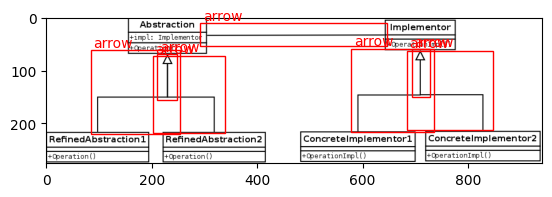



Number of elements per class:
arrow: 7


tensor([692.9927,  59.5989, 727.0041, 149.0860]) tensor(0.8854) arrow
tensor([201.6947,  72.2301, 338.2031, 217.6361]) tensor(0.8841) arrow
tensor([210.0420,  69.0856, 246.9014, 154.7231]) tensor(0.8788) arrow
tensor([683.8920,  61.5759, 847.1186, 213.3140]) tensor(0.8769) arrow
tensor([578.7164,  57.8540, 734.8381, 216.3882]) tensor(0.8416) arrow
tensor([ 84.2206,  60.8981, 252.8074, 220.5891]) tensor(0.7748) arrow
tensor([291.7317,   9.5858, 646.2210,  52.6906]) tensor(0.7619) arrow
Total number of preictions:  7 



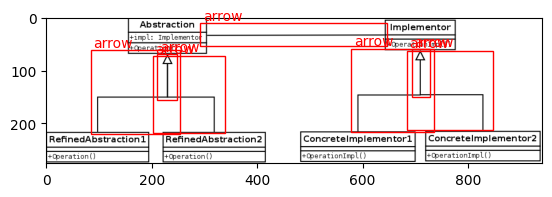



tensor([692.9927,  59.5989, 727.0041, 149.0860]) arrow tensor(0.8854)
tensor([201.6947,  72.2301, 338.2031, 217.6361]) arrow tensor(0.8841)
tensor([210.0420,  69.0856, 246.9014, 154.7231]) arrow tensor(0.8788)
tensor([683.8920,  61.5759, 847.1186, 213.3140]) arrow tensor(0.8769)
tensor([578.7164,  57.8540, 734.8381, 216.3882]) arrow tensor(0.8416)
tensor([ 84.2206,  60.8981, 252.8074, 220.5891]) arrow tensor(0.7748)
tensor([291.7317,   9.5858, 646.2210,  52.6906]) arrow tensor(0.7619)
F18 — Number of lines.
7
F7 — Average line length
251.286
F8 — Line length variation
51.277
F9 — Longest line.
403.0
F10 — Shortest line.
84.0
F3 — Line bends
3.0
F4 — Line angles
54.643
ALL LENGHT and BENDS
[85.0, 245.0, 84.0, 275.0, 275.0, 392.0, 403.0]
[2, 3, 2, 3, 3, 4, 4]
[[90.0, 0.0], [0.0, 90.0, 90.0], [90.0, 0.0], [0.0, 90.0, 90.0], [0.0, 90.0, 90.0], [0.0, 0.0, 90.0, 90.0], [0.0, 90.0, 90.0, 90.0]]


In [45]:
image=utils.read_image('/content/drive/My Drive/dataset_label/test/02_uml.png')

# Creazione dell'oggetto UMLClassSegmenter
acc_threshold = 0.7
iou_threshold=0.2
desired_class = 'arrow'
arrow_extractor = arrow_feature_extractor_HP(image,acc_threshold,iou_threshold,desired_class)



#arrow_extractor.show_class()
print("F18 — Number of lines.")
print(arrow_extractor.compute_n_arrow())
print("F7 — Average line length")
print(arrow_extractor.compute_avg_arrow_lenght())
print("F8 — Line length variation")
print(arrow_extractor.compute_std_deviation())
print("F9 — Longest line.")
print(arrow_extractor.compute_max_arrow_lenght())
print("F10 — Shortest line.")
print(arrow_extractor.compute_min_arrow_lenght())
print("F3 — Line bends")
print(arrow_extractor.compute_line_bends())
print("F4 — Line angles")
print(arrow_extractor.compute_line_angles())
print("ALL LENGHT and BENDS")
list_lenght = []
list_bends = []
list_slopes = []
list_lenght , list_bends , list_slopes= arrow_extractor.find_lenght_bends_slopes()
print(list_lenght)
print(list_bends)
print(list_slopes)



[[90.0, 0.0], [0.0, 90.0, 90.0], [90.0, 0.0], [0.0, 90.0, 90.0], [0.0, 90.0, 90.0], [0.0, 0.0, 90.0, 90.0], [0.0, 90.0, 90.0, 90.0]]


### Test arrow

Image Shape:  (276, 941, 3)
Filtered predictions after thresholding, keeping only the 'class' class.
Total number of predictions:  7 



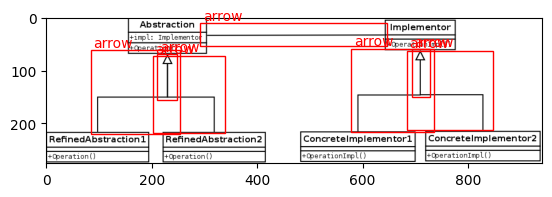



Number of elements per class:
arrow: 7


tensor([692.9927,  59.5989, 727.0041, 149.0860]) tensor(0.8854) arrow
tensor([201.6947,  72.2301, 338.2031, 217.6361]) tensor(0.8841) arrow
tensor([210.0420,  69.0856, 246.9014, 154.7231]) tensor(0.8788) arrow
tensor([683.8920,  61.5759, 847.1186, 213.3140]) tensor(0.8769) arrow
tensor([578.7164,  57.8540, 734.8381, 216.3882]) tensor(0.8416) arrow
tensor([ 84.2206,  60.8981, 252.8074, 220.5891]) tensor(0.7748) arrow
tensor([291.7317,   9.5858, 646.2210,  52.6906]) tensor(0.7619) arrow
Total number of preictions:  7 



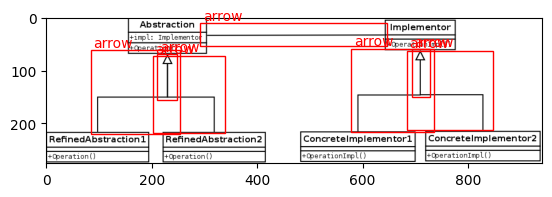



tensor([692.9927,  59.5989, 727.0041, 149.0860]) arrow tensor(0.8854)
tensor([201.6947,  72.2301, 338.2031, 217.6361]) arrow tensor(0.8841)
tensor([210.0420,  69.0856, 246.9014, 154.7231]) arrow tensor(0.8788)
tensor([683.8920,  61.5759, 847.1186, 213.3140]) arrow tensor(0.8769)
tensor([578.7164,  57.8540, 734.8381, 216.3882]) arrow tensor(0.8416)
tensor([ 84.2206,  60.8981, 252.8074, 220.5891]) arrow tensor(0.7748)
tensor([291.7317,   9.5858, 646.2210,  52.6906]) arrow tensor(0.7619)


In [22]:
image=utils.read_image('/content/drive/My Drive/dataset_label/test/02_uml.png')

# Creazione dell'oggetto UMLClassSegmenter
acc_threshold = 0.7
iou_threshold=0.2
desired_class = 'arrow'
arrow_extractor = arrow_feature_extractor_HP(image,acc_threshold,iou_threshold,desired_class)
images = arrow_extractor.get_arrow()

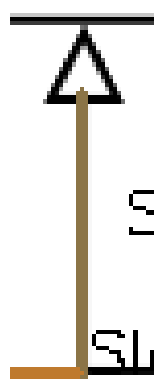

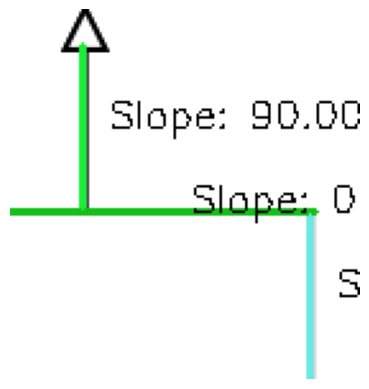

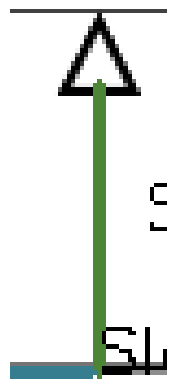

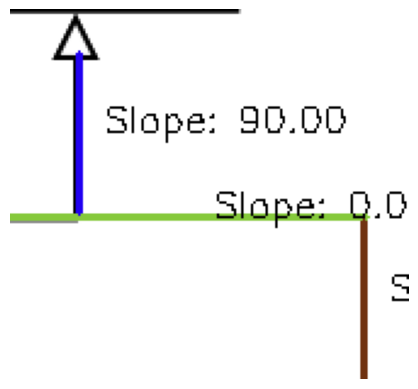

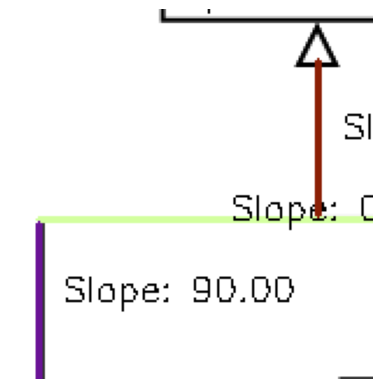

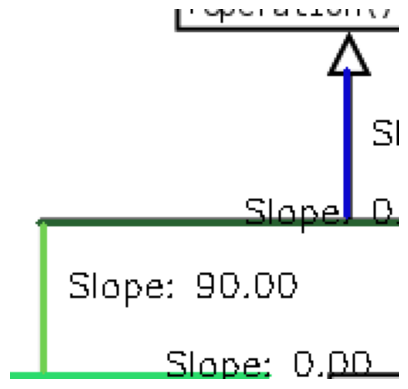

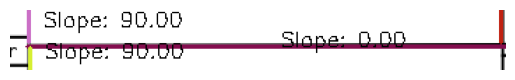

Lengths of selected lines: [85.0, 245.0, 84.0, 275.0, 275.0, 392.0, 403.0]
Slopes of selected lines:
Image 1: [90.0, 0.0]
Image 2: [0.0, 90.0, 90.0]
Image 3: [90.0, 0.0]
Image 4: [0.0, 90.0, 90.0]
Image 5: [0.0, 90.0, 90.0]
Image 6: [0.0, 0.0, 90.0, 90.0]
Image 7: [0.0, 90.0, 90.0, 90.0]


In [36]:
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

# Funzione per calcolare tutti i punti intermedi delle linee
def intermediate_points(line):
    x1, y1, x2, y2 = line[0]
    points = []
    dx = abs(x2 - x1)
    dy = abs(y2 - y1)
    steps = max(dx, dy)
    if steps == 0:
        return [(x1, y1)]
    x_inc = (x2 - x1) / steps
    y_inc = (y2 - y1) / steps
    for i in range(steps + 1):
        points.append((round(x1 + i * x_inc), round(y1 + i * y_inc)))
    return points

# Funzione per controllare se due linee hanno almeno un punto vicino tra loro
def are_lines_close(line1, line2, threshold=6):
    points_line1 = intermediate_points(line1)
    points_line2 = intermediate_points(line2)

    for x1, y1 in points_line1:
        for x2, y2 in points_line2:
            dist = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
            if dist <= threshold:
                return True
    return False

def connect_lines(image):
    height, width, channel = image.shape
    img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    out = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    img = 255 - cv2.medianBlur(img, 3)

    theta_resolution_degrees = 45
    theta_resolution_radians = np.pi / 180 * theta_resolution_degrees
    min_size = min(height, width)
    threshold = math.floor(0.2 * min_size)
    lines = cv2.HoughLinesP(img, 1, theta_resolution_radians, 20, minLineLength=threshold, maxLineGap=2)

    colors = [(random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)) for _ in range(len(lines))]

    centers = []
    for line in lines:
        for x1, y1, x2, y2 in line:
            center_x = round((x1 + x2) / 2)
            center_y = round((y1 + y2) / 2)
            centers.append((center_x, center_y))

    grouped_lines = {}
    for i, (center_x, center_y) in enumerate(centers):
        grouped = False
        for center, group in grouped_lines.items():
            if abs(center_x - center[0]) <= 20 and abs(center_y - center[1]) <= 20:  #vengono raggruppate tutte le linee che hanno come punto centrale un punto che ricade in un punto x +- 20 pixels , così riesco ad eliminare le linee che dll'algoritmo vengono trovate due volte
                group.append(lines[i])
                grouped = True
                break
        if not grouped:
            grouped_lines[(center_x, center_y)] = [lines[i]]

    selected_lines = []
    for group in grouped_lines.values():
        longest_length = 0
        longest_line = None
        for line in group:
            for x1, y1, x2, y2 in line:
                length = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
                if length > longest_length:
                    longest_length = length
                    longest_line = line
        if longest_line is not None:
            selected_lines.append(longest_line)

    connected_lines = []
    for i, line1 in enumerate(selected_lines):
        connected = False
        for j, line2 in enumerate(selected_lines):
            if i != j:
                if are_lines_close(line1, line2, threshold=6): #6 pixel threshold per mantenere il gruppo con le linee vicine , per selezionare le linee continue che compongono la freccia
                    connected = True
                    break
        if connected:
            connected_lines.append(line1)

    # Create a list to store slopes for each image
    slope_list = []

    # Calculate slopes of each line and plot them
    for line in connected_lines:
        for x1, y1, x2, y2 in line:
            # Calculate the slope of the line
            if x2 - x1 == 0:
                slope = float('90')
            else:
                slope = (y2 - y1) / (x2 - x1)

            # Plot the line on the image
            color = colors[np.where((lines == line).all(axis=(1, 2)))[0][0]]
            cv2.line(out, (x1, y1), (x2, y2), color, 2)

            # Plot the slope value near the line
            slope_text = f"Slope: {slope:.2f}"
            text_pos = (round((x1 + x2) / 2) + 10, round((y1 + y2) / 2))
            cv2.putText(out, slope_text, text_pos, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1)

            # Append the slope to the slope_list
            slope_list.append(slope)


    total_length = 0
    for line in connected_lines:
        for x1, y1, x2, y2 in line:
            length = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
            total_length += length

    return out, total_length , slope_list


# Lista di immagini
images = arrow_extractor.get_arrow()

# Lista per memorizzare le lunghezze delle linee selezionate per ogni immagine
list_length = []

# Lista per memorizzare gli slope delle linee per ogni immagine
list_slope = []

# Applica l'algoritmo a ciascuna immagine
for image in images:
    result_image, total_length, slope_list = connect_lines(image)
    list_length.append(total_length)
    list_slope.append(slope_list)

    plt.imshow(result_image)
    plt.axis('off')
    plt.show()

# Stampa le lunghezze delle linee per ogni immagine
print("Lengths of selected lines:", list_length)

# Stampa gli slope delle linee per ogni immagine
print("Slopes of selected lines:")
for i, slopes in enumerate(list_slope):
    print(f"Image {i + 1}: {slopes}")

# OpenCV

## Rectangle Detection

Problemi :
- detection di quello esterno non va bene....
aspect ratio non uso openCV ---> RISOLTO

- frecce rilevate...

Number of contours detected: 953


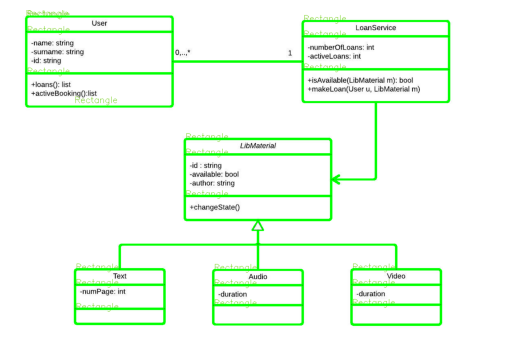

Number of rectangles found: 20


In [ ]:
img = cv2.imread('/content/drive/MyDrive/UML/class.jpg')
rectangle_count = 0
height, width, _ = img.shape
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,50,255,0)
contours,hierarchy = cv2.findContours(thresh, 1, 2)  #-> modifico il secondo valore per selezionare contorni diversi
print("Number of contours detected:", len(contours))

for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    ratio = float(w) / h
    if ratio >= 0.9 and ratio <= 1.1:
        continue  # Salta i quadrati
    if w < 20 or h < 20:  #w e h espressi in pixel
        continue  # Salta i rettangoli piccoli
    if w>=width or h>=height:
        continue

    rectangle_count += 1
    cv2.putText(img, 'Rectangle', (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 200, 100), 1)
    img = cv2.drawContours(img, [cnt], -1, (0, 255, 0), 2)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')  # Rimuove gli assi dell'immagine
plt.show()
print("Number of rectangles found:", rectangle_count)



## Text extraction

In [ ]:
pip install pytesseract
!apt-get install tesseract-ocr
!pip install pytesseract
pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2
import pytesseract

In [ ]:
img = cv2.imread('/content/drive/MyDrive/UML/class2.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
extracted_text = pytesseract.image_to_string(gray)


In [ ]:
print(extracted_text)


Bank Account

Current Account Saving Account Credit Account

 

 



#IDEA

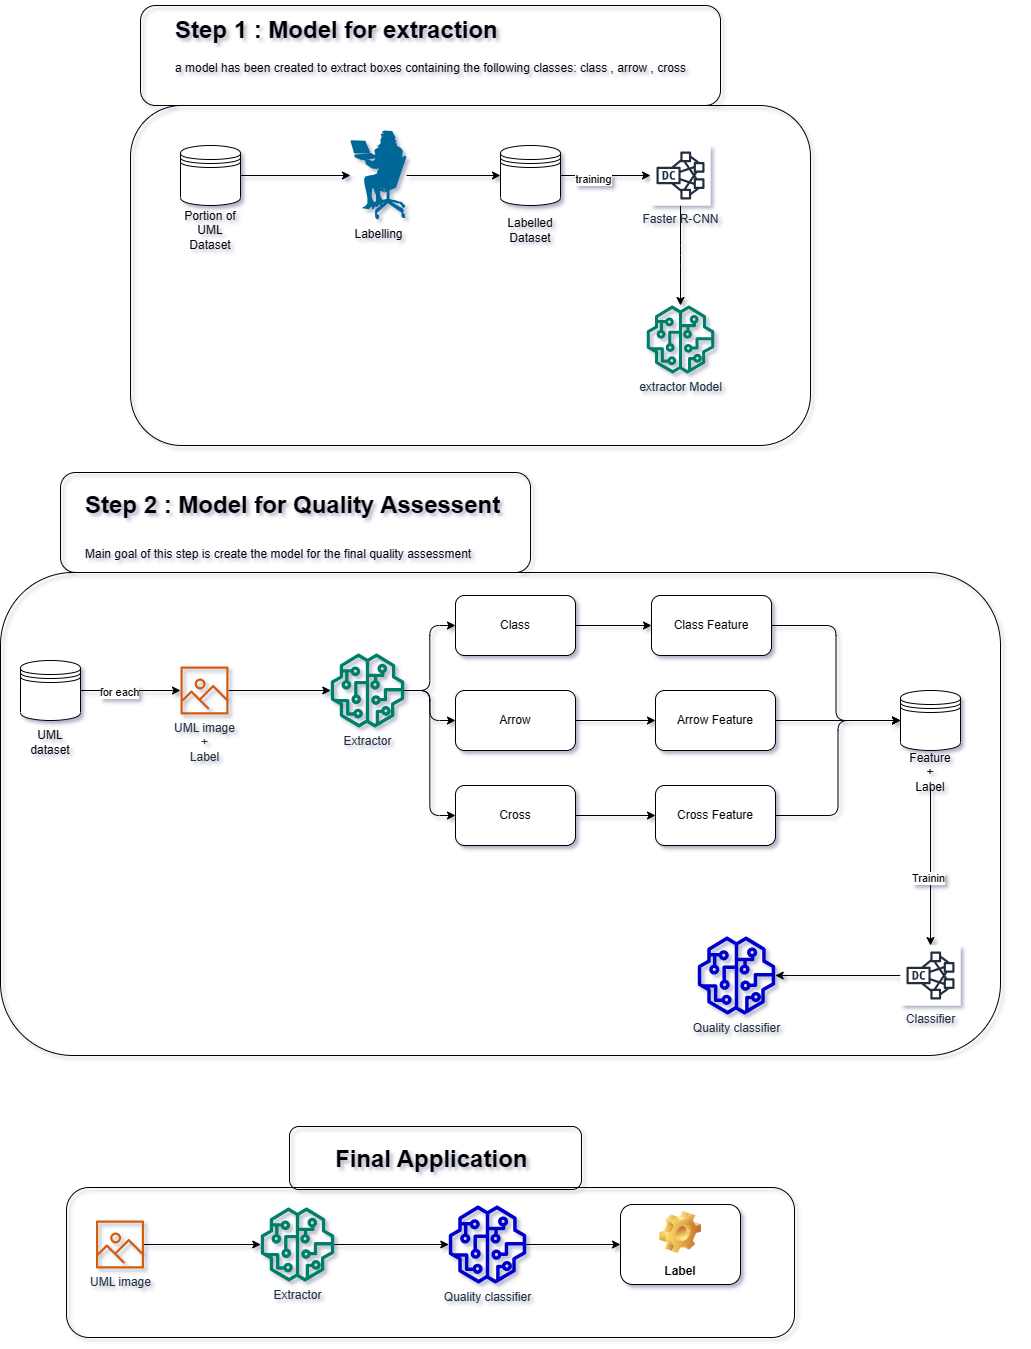

#Graveyard

## Arrow Detection

### Version 1.0

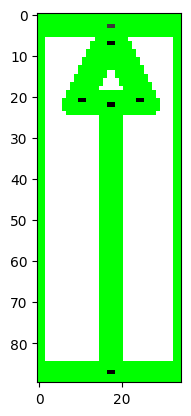

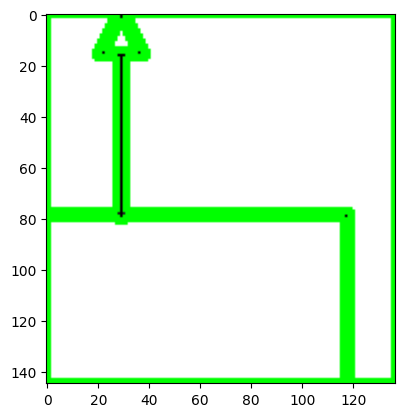

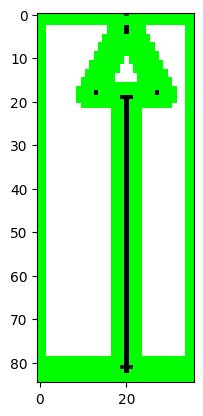

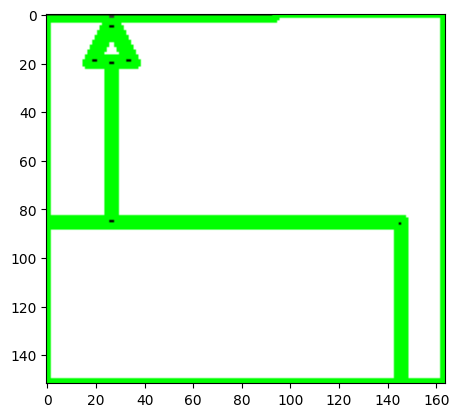

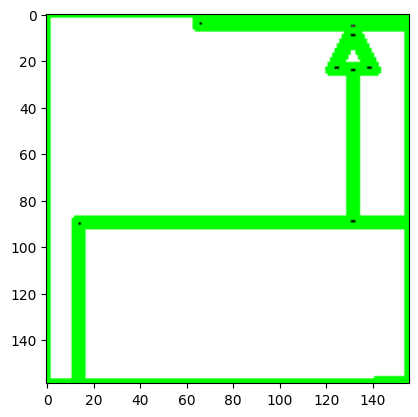

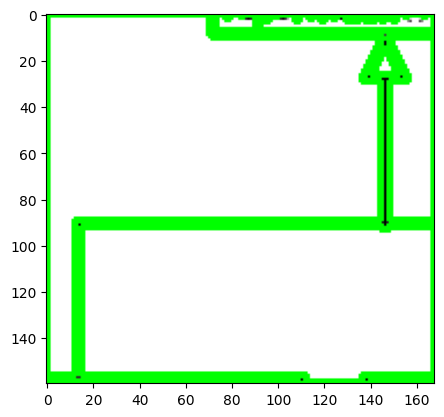

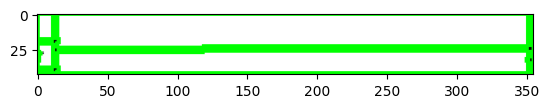

In [ ]:
import cv2
import matplotlib.pyplot as plt
images = arrow_extractor.get_arrow()

def detect_and_show_contours(image):
    # Converti l'immagine in scala di grigi
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Applica il thresholding per ottenere un'immagine binaria
    _, binary_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)

    # Trova i contorni nell'immagine binaria
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Crea una copia dell'immagine originale
    img_with_contours = image.copy()

    # Disegna i contorni sull'immagine copia
    cv2.drawContours(img_with_contours, contours, -1, (0, 255, 0), 2)

    return img_with_contours

# Itera su ogni immagine nella lista e applica il rilevamento dei contorni
for image in images:
    image_with_contours = detect_and_show_contours(image)

    # Visualizza l'immagine con i contorni trovati
    plt.imshow(cv2.cvtColor(image_with_contours, cv2.COLOR_BGR2RGB))
    plt.show()







### Version 2.0

https://stackoverflow.com/questions/66718462/how-to-detect-different-types-of-arrows-in-image

Max Thickness: 9.31638868129394
Max Angle: -77.76388849058367
Max Length: 84.92938243034621



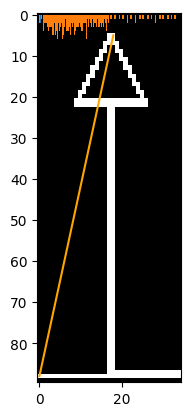

Max Thickness: 7.875647658369511
Max Angle: 57.9946167919165
Max Length: 169.81166037701888



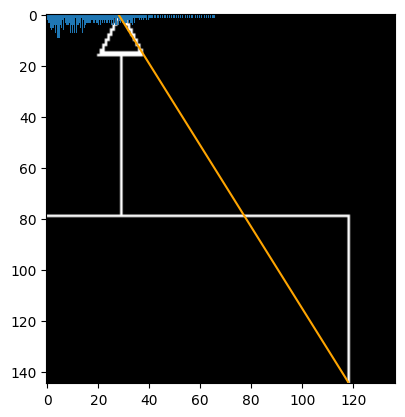

Max Thickness: 6.338365110057188
Max Angle: -75.96375653207353
Max Length: 82.46211251235322



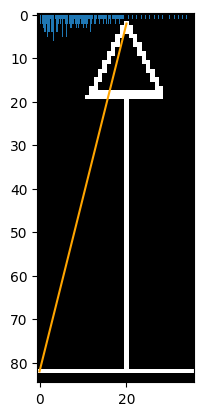

Max Thickness: 7.710852157656112
Max Angle: 51.19883731350568
Max Length: 189.90787240133042



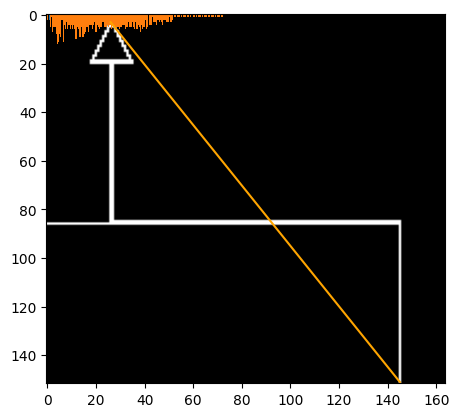

Max Thickness: 8.332793275205681
Max Angle: -51.7590811269705
Max Length: 192.25503894566717



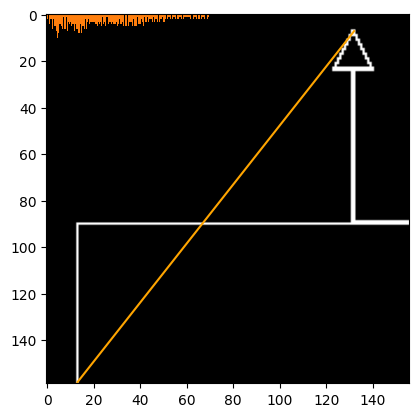

Max Thickness: 13.926443091274788
Max Angle: -47.47166476163341
Max Length: 196.7587355112855



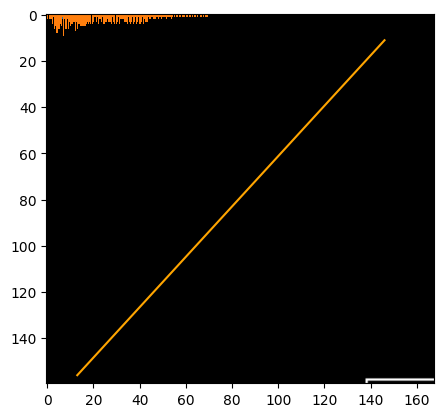

<ipython-input-10-79af6bc72411>:41: RuntimeWarning: divide by zero encountered in long_scalars
  arrow_slope = (far_point_2[0] - far_point_1[0]) / (far_point_2[1] - far_point_1[1])


Max Thickness: 1.9983079330423714
Max Angle: -0.17103166964991307
Max Length: 335.0014925339886



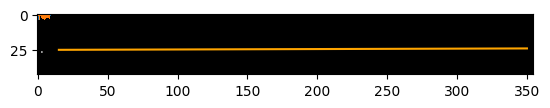

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from scipy.spatial import distance
import math

# Assuming `images` is a list of images containing arrows

for img in images:
    # Convert the image to grayscale if it's not already
    if len(img.shape) > 2:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    _, img = cv2.threshold(img, 10, 255, cv2.THRESH_BINARY_INV)
    labels, stats = cv2.connectedComponentsWithStats(img, 8)[1:3]

    max_arrow_length = 0
    max_arrow_thickness = 0
    max_arrow_angle = 0
    max_arrow_points = None

    for label in np.unique(labels)[1:]:
        arrow = labels == label
        indices = np.transpose(np.nonzero(arrow))  # y, x

        dist = distance.cdist(indices, indices, 'euclidean')
        far_points_index = np.unravel_index(np.argmax(dist), dist.shape)  # y, x

        far_point_1 = indices[far_points_index[0], :]  # y, x
        far_point_2 = indices[far_points_index[1], :]  # y, x

        # Length
        arrow_length = distance.cdist(far_point_1.reshape(1, 2), far_point_2.reshape(1, 2), 'euclidean')[0][0]

        if arrow_length > max_arrow_length:
            max_arrow_length = arrow_length
            max_arrow_points = (far_point_1, far_point_2)

            # Slope
            arrow_slope = (far_point_2[0] - far_point_1[0]) / (far_point_2[1] - far_point_1[1])
            max_arrow_angle = math.degrees(math.atan(arrow_slope))

            # Thickness
            x = np.linspace(far_point_1[1], far_point_2[1], 20)
            y = np.linspace(far_point_1[0], far_point_2[0], 20)
            line = np.array([[yy, xx] for yy, xx in zip(y, x)])
            thickness_dist = np.amin(distance.cdist(line, indices, 'euclidean'), axis=0).flatten()

            n, bins, patches = plt.hist(thickness_dist, bins=150)

            max_arrow_thickness = 2 * bins[np.argmax(n)]

    print(f"Max Thickness: {max_arrow_thickness}")
    print(f"Max Angle: {max_arrow_angle}")
    print(f"Max Length: {max_arrow_length}\n")

    # Display the image with the largest arrow
    plt.imshow(cv2.cvtColor(arrow.astype(np.uint8) * 255, cv2.COLOR_BGR2RGB))
    plt.plot([max_arrow_points[0][1], max_arrow_points[1][1]], [max_arrow_points[0][0], max_arrow_points[1][0]], color='orange')
    plt.show()


### Version 3.0

Max Length: 2727.4342767211015



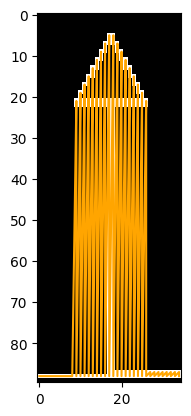

Max Length: 2753.1258238315813



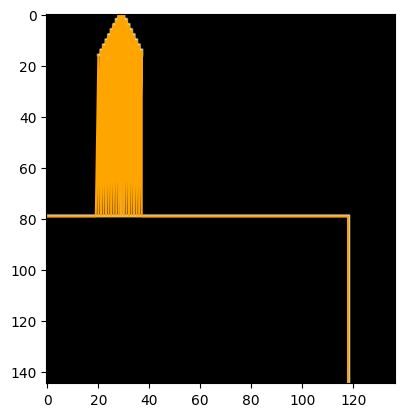

Max Length: 2607.1257447270445



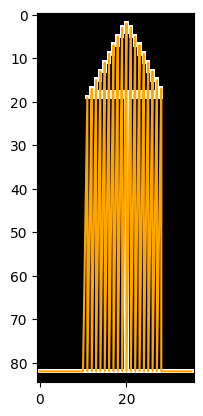

Max Length: 3047.684060083135



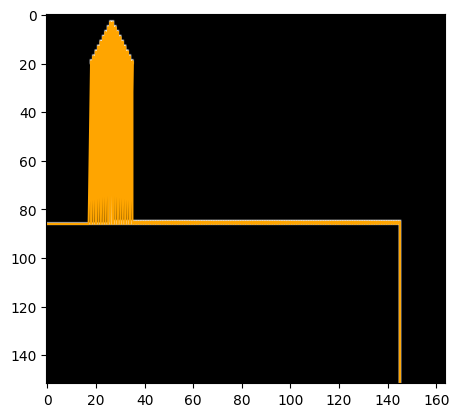

Max Length: 2980.3411242013885



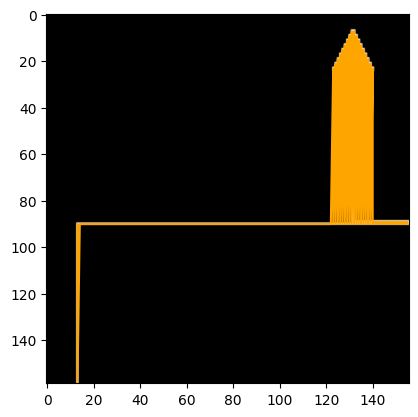

Max Length: 2856.5476501419976



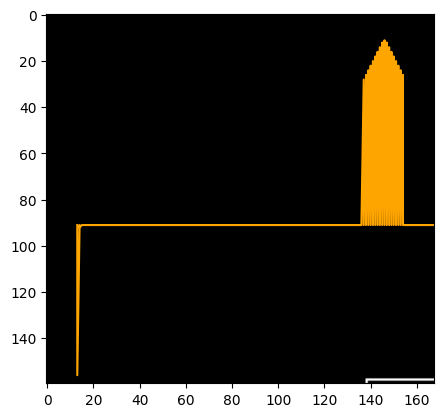

Max Length: 347.72792206135796



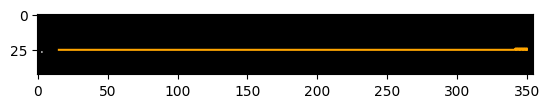

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

# Assuming `images` is a list of images containing arrows

for img in images:
    # Convert the image to grayscale if it's not already
    if len(img.shape) > 2:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    _, img = cv2.threshold(img, 10, 255, cv2.THRESH_BINARY_INV)
    labels, stats = cv2.connectedComponentsWithStats(img, 8)[1:3]

    max_arrow_length = 0
    max_arrow_points = None

    for label in np.unique(labels)[1:]:
        arrow = labels == label
        indices = np.transpose(np.nonzero(arrow))  # y, x

        dist = distance.cdist(indices, indices, 'euclidean')
        far_points_index = np.unravel_index(np.argmax(dist), dist.shape)  # y, x

        far_point_1 = indices[far_points_index[0], :]  # y, x
        far_point_2 = indices[far_points_index[1], :]  # y, x

        # Length
        arrow_length = distance.cdist(far_point_1.reshape(1, 2), far_point_2.reshape(1, 2), 'euclidean')[0][0]

        if arrow_length > max_arrow_length:
            max_arrow_length = arrow_length
            max_arrow_points = (far_point_1, far_point_2)

            # Calculate the length of the broken arrow
            sorted_indices = sorted(indices, key=lambda x: x[1])
            broken_arrow_length = 0
            for i in range(len(sorted_indices) - 1):
                broken_arrow_length += distance.cdist(sorted_indices[i].reshape(1, 2), sorted_indices[i + 1].reshape(1, 2), 'euclidean')[0][0]

    print(f"Max Length: {broken_arrow_length}\n")

    # Display the image with the largest arrow
    plt.imshow(cv2.cvtColor(arrow.astype(np.uint8) * 255, cv2.COLOR_BGR2RGB))
    x_coords = [point[1] for point in sorted_indices]
    y_coords = [point[0] for point in sorted_indices]
    plt.plot(x_coords, y_coords, color='orange')
    plt.show()


### Version Solo Bordi

Image Shape:  (276, 941, 3)
Filtered predictions after thresholding, keeping only the 'class' class.
Total number of predictions:  7 



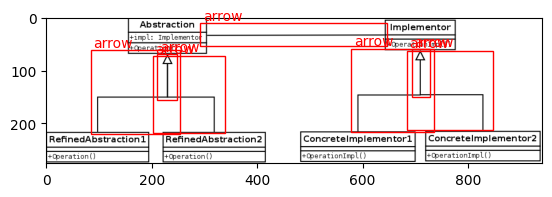



Number of elements per class:
arrow: 7


tensor([692.9927,  59.5989, 727.0041, 149.0860]) tensor(0.8854) arrow
tensor([201.6947,  72.2301, 338.2031, 217.6361]) tensor(0.8841) arrow
tensor([210.0420,  69.0856, 246.9014, 154.7231]) tensor(0.8788) arrow
tensor([683.8920,  61.5759, 847.1186, 213.3140]) tensor(0.8769) arrow
tensor([578.7164,  57.8540, 734.8381, 216.3882]) tensor(0.8416) arrow
tensor([ 84.2206,  60.8981, 252.8074, 220.5891]) tensor(0.7748) arrow
tensor([291.7317,   9.5858, 646.2210,  52.6906]) tensor(0.7619) arrow
Total number of preictions:  7 



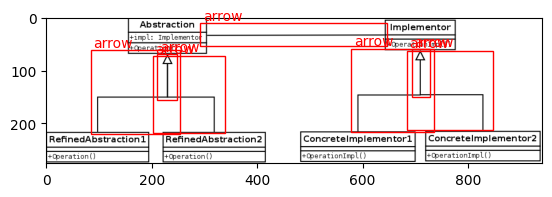



tensor([692.9927,  59.5989, 727.0041, 149.0860]) arrow tensor(0.8854)
tensor([201.6947,  72.2301, 338.2031, 217.6361]) arrow tensor(0.8841)
tensor([210.0420,  69.0856, 246.9014, 154.7231]) arrow tensor(0.8788)
tensor([683.8920,  61.5759, 847.1186, 213.3140]) arrow tensor(0.8769)
tensor([578.7164,  57.8540, 734.8381, 216.3882]) arrow tensor(0.8416)
tensor([ 84.2206,  60.8981, 252.8074, 220.5891]) arrow tensor(0.7748)
tensor([291.7317,   9.5858, 646.2210,  52.6906]) arrow tensor(0.7619)


In [ ]:
image=utils.read_image('/content/drive/My Drive/dataset_label/test/02_uml.png')

# Creazione dell'oggetto UMLClassSegmenter
acc_threshold = 0.7
iou_threshold=0.2
desired_class = 'arrow'
arrow_extractor = arrow_feature_extractor(image,acc_threshold,iou_threshold,desired_class)
images = arrow_extractor.get_arrow()

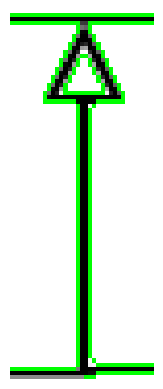

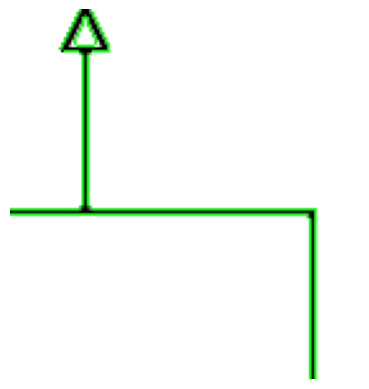

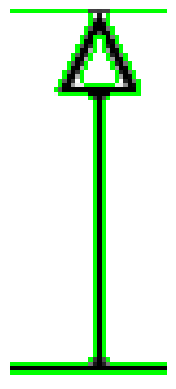

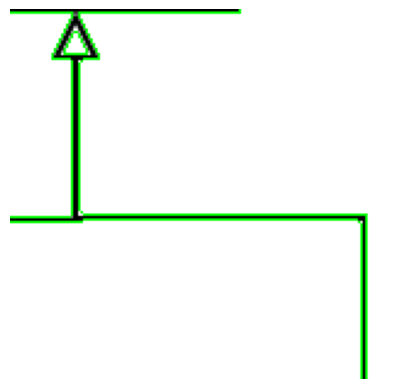

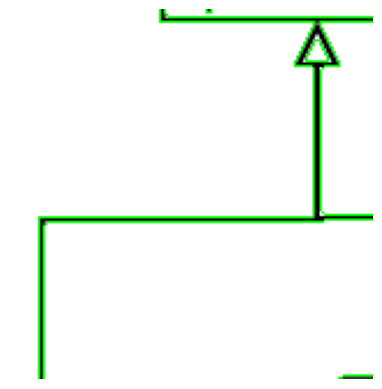

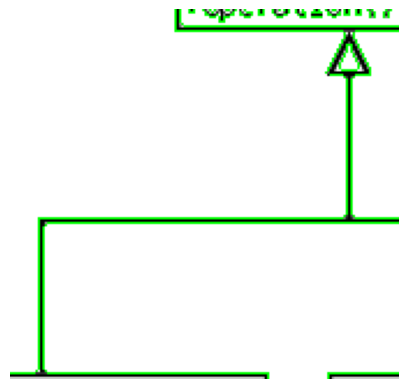

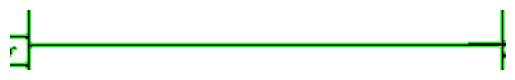

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def enhance_lines(img):
    # Converti l'immagine in scala di grigi
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # Applica una trasformazione di contrasto (es. equalizzazione dell'istogramma)
    equalized_img = cv2.equalizeHist(gray_img)

    # Trova i bordi delle linee utilizzando l'algoritmo di Canny
    edges = cv2.Canny(equalized_img, threshold1=30, threshold2=100)

    # Crea un'immagine vuota con lo stesso formato dell'immagine originale
    highlighted_img = np.copy(img)

    # Imposta il colore delle linee evidenziate in verde (puoi personalizzare il colore)
    line_color = (0, 255, 0)

    # Evidenzia i bordi trovati sulle linee nell'immagine originale
    highlighted_img[edges != 0] = line_color

    return highlighted_img

# Supponiamo che images sia una lista di immagini

for img in images:
    # Evidenzia le linee nell'immagine corrente
    highlighted_img = enhance_lines(img)

    # Visualizza l'immagine risultante
    plt.imshow(highlighted_img)
    plt.axis('off')
    plt.show()


###Version Harris Corner

Max Length: 84.92938243034621



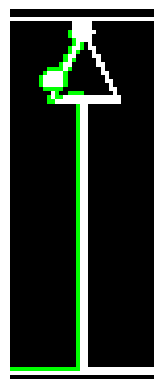

Max Length: 169.81166037701888



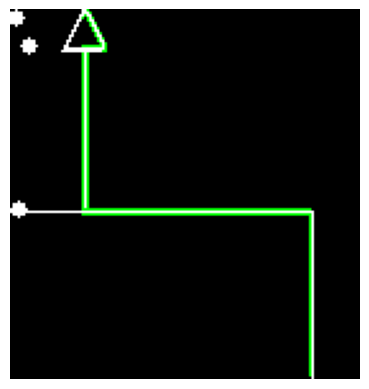

Max Length: 82.46211251235322



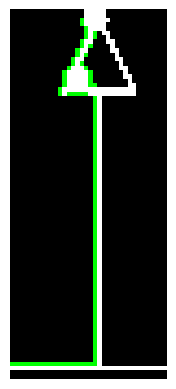

Max Length: 189.90787240133042



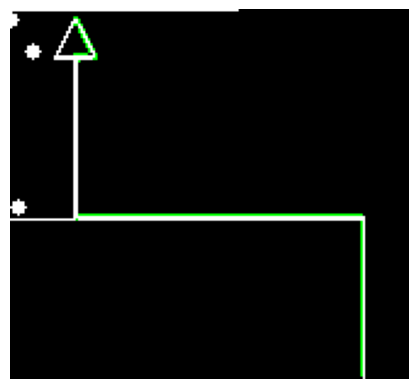

Max Length: 192.25503894566717



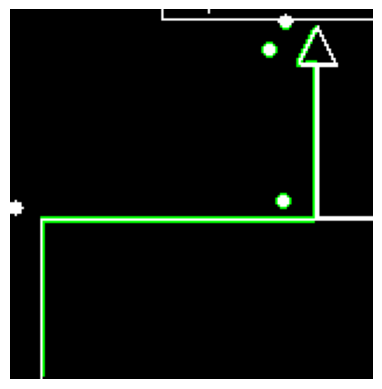

Max Length: 196.7587355112855



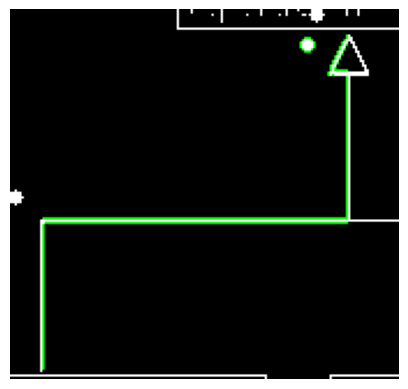

Max Length: 335.0014925339886



IndexError: ignored

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from scipy.spatial import distance

def enhance_lines_between_points(img, far_point_1, far_point_2):
    # Converti l'immagine in scala di grigi
    if len(img.shape) > 2:
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    else:
        gray_img = img.copy()

    # Applica una trasformazione di contrasto (es. equalizzazione dell'istogramma)
    equalized_img = cv2.equalizeHist(gray_img)

    # Trova i bordi delle linee utilizzando l'algoritmo di Canny
    edges = cv2.Canny(equalized_img, threshold1=30, threshold2=100)

    # Crea un'immagine vuota con lo stesso formato dell'immagine originale
    highlighted_img = np.copy(img)

    # Imposta il colore delle linee evidenziate in verde (puoi personalizzare il colore)
    line_color = (0, 255, 0)

    # Evidenzia solo i bordi trovati sulle linee nell'area definita da far_point_1 e far_point_2
    mask = np.zeros_like(edges)
    mask[min(far_point_1[0], far_point_2[0]): max(far_point_1[0], far_point_2[0]),
         min(far_point_1[1], far_point_2[1]): max(far_point_1[1], far_point_2[1])] = 255

    # Converti l'immagine in scala di grigi in un'immagine a colori
    highlighted_img = cv2.merge([highlighted_img, highlighted_img, highlighted_img])

    # Assegna il colore alle linee nell'area definita da far_point_1 e far_point_2
    highlighted_img[np.logical_and(edges != 0, mask != 0)] = line_color

    return highlighted_img

def harris_corner_detection(img, max_corners=100, quality_level=0.01, min_distance=10):
    if len(img.shape) > 2:
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    else:
        gray_img = img.copy()

    gray_img = np.float32(gray_img)
    corners = cv2.cornerHarris(gray_img, blockSize=2, ksize=3, k=0.04)

    # Applica un filtro per selezionare solo i punti con una certa qualità
    corners_filtered = np.zeros_like(corners)
    corners_filtered[corners > quality_level * corners.max()] = 1

    # Sceglie i punti più forti in base alla qualità
    corners_indices = np.argwhere(corners_filtered == 1)
    corners_indices = corners_indices[np.argsort(corners[corners_filtered == 1])][::-1]

    # Seleziona solo un massimo di max_corners punti con una distanza minima tra loro
    selected_corners = [corners_indices[0]]
    for corner in corners_indices:
        if np.min(distance.cdist(corner.reshape(1, 2), selected_corners)) > min_distance:
            selected_corners.append(corner)
        if len(selected_corners) == max_corners:
            break

    return selected_corners
for img in images:
    # Convert the image to grayscale if it's not already
    if len(img.shape) > 2:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    _, img = cv2.threshold(img, 10, 255, cv2.THRESH_BINARY_INV)
    labels, stats = cv2.connectedComponentsWithStats(img, 8)[1:3]

    max_arrow_length = 0
    max_arrow_thickness = 0
    max_arrow_angle = 0
    max_arrow_points = None

    for label in np.unique(labels)[1:]:
        arrow = labels == label
        indices = np.transpose(np.nonzero(arrow))  # y, x

        dist = distance.cdist(indices, indices, 'euclidean')
        far_points_index = np.unravel_index(np.argmax(dist), dist.shape)  # y, x

        far_point_1 = indices[far_points_index[0], :]  # y, x
        far_point_2 = indices[far_points_index[1], :]  # y, x

        # Length
        arrow_length = distance.cdist(far_point_1.reshape(1, 2), far_point_2.reshape(1, 2), 'euclidean')[0][0]

        if arrow_length > max_arrow_length:
            max_arrow_length = arrow_length
            max_arrow_points = (far_point_1, far_point_2)

    print(f"Max Length: {max_arrow_length}\n")

    # Esegui Harris Corner Detection per trovare i punti rilevanti tra far_point_1 e far_point_2
    corners = harris_corner_detection(img[min(max_arrow_points[0][0], max_arrow_points[1][0]):
                                          max(max_arrow_points[0][0], max_arrow_points[1][0]),
                                          min(max_arrow_points[0][1], max_arrow_points[1][1]):
                                          max(max_arrow_points[0][1], max_arrow_points[1][1])])

    # Verifica se ci sono punti rilevanti e se sono sufficienti per l'evidenziazione delle linee
    if len(corners) < 2:
        print("Non ci sono abbastanza punti rilevanti per evidenziare le linee.")
        continue

    # Copia l'immagine originale per l'evidenziazione dei punti
    highlighted_img = np.copy(img)

    # Evidenzia i punti con pallini rossi
    for corner in corners:
        cv2.circle(highlighted_img, (corner[1], corner[0]), 3, (255, 0, 0), -1)

    # Evidenzia le linee nell'area definita da far_point_1 e far_point_2
    highlighted_img = enhance_lines_between_points(highlighted_img, max_arrow_points[0], max_arrow_points[1])

    # Visualizza l'immagine risultante
    plt.imshow(highlighted_img, cmap='gray')
    plt.axis('off')
    plt.show()

###Version Naive

Image Shape:  (276, 941, 3)
Filtered predictions after thresholding, keeping only the 'class' class.
Total number of predictions:  7 



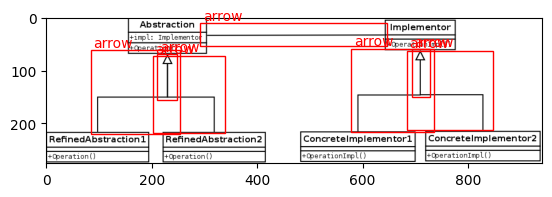



Number of elements per class:
arrow: 7


tensor([692.9927,  59.5989, 727.0041, 149.0860]) tensor(0.8854) arrow
tensor([201.6947,  72.2301, 338.2031, 217.6361]) tensor(0.8841) arrow
tensor([210.0420,  69.0856, 246.9014, 154.7231]) tensor(0.8788) arrow
tensor([683.8920,  61.5759, 847.1186, 213.3140]) tensor(0.8769) arrow
tensor([578.7164,  57.8540, 734.8381, 216.3882]) tensor(0.8416) arrow
tensor([ 84.2206,  60.8981, 252.8074, 220.5891]) tensor(0.7748) arrow
tensor([291.7317,   9.5858, 646.2210,  52.6906]) tensor(0.7619) arrow
Total number of preictions:  7 



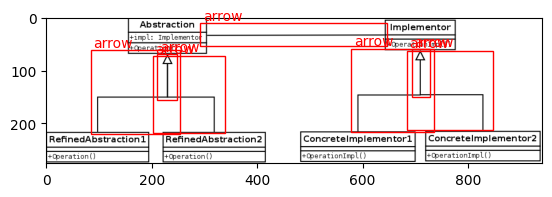



tensor([692.9927,  59.5989, 727.0041, 149.0860]) arrow tensor(0.8854)
tensor([201.6947,  72.2301, 338.2031, 217.6361]) arrow tensor(0.8841)
tensor([210.0420,  69.0856, 246.9014, 154.7231]) arrow tensor(0.8788)
tensor([683.8920,  61.5759, 847.1186, 213.3140]) arrow tensor(0.8769)
tensor([578.7164,  57.8540, 734.8381, 216.3882]) arrow tensor(0.8416)
tensor([ 84.2206,  60.8981, 252.8074, 220.5891]) arrow tensor(0.7748)
tensor([291.7317,   9.5858, 646.2210,  52.6906]) arrow tensor(0.7619)


In [ ]:
image=utils.read_image('/content/drive/My Drive/dataset_label/test/02_uml.png')

# Creazione dell'oggetto UMLClassSegmenter
acc_threshold = 0.7
iou_threshold=0.2
desired_class = 'arrow'
arrow_extractor = arrow_feature_extractor(image,acc_threshold,iou_threshold,desired_class)
images = arrow_extractor.get_arrow()

Max Length: 84.929



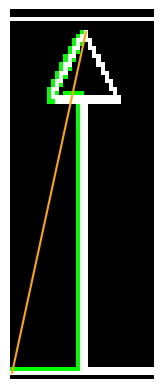

Max Length: 169.812



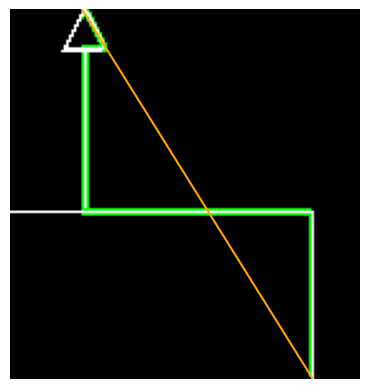

Max Length: 82.462



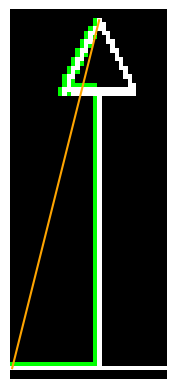

Max Length: 189.908



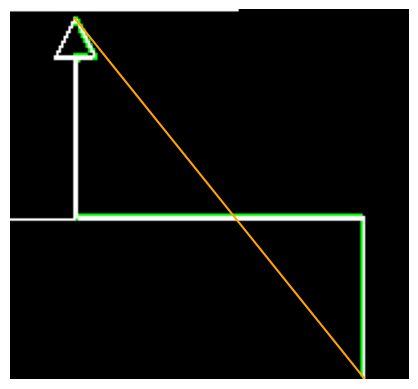

Max Length: 192.255



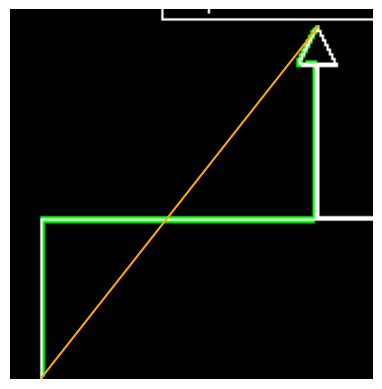

Max Length: 196.759



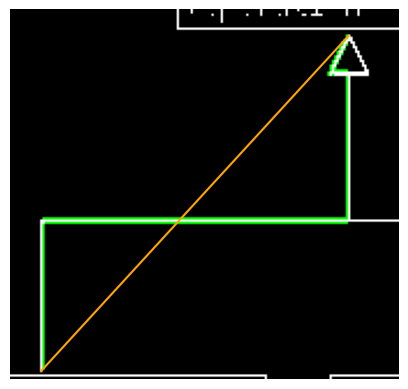

Max Length: 335.001



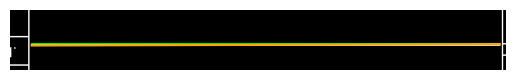

[84.929, 169.812, 82.462, 189.908, 192.255, 196.759, 335.001]

In [ ]:
images = arrow_extractor.get_arrow()
import cv2
import numpy as np
import matplotlib.pyplot as plt

from scipy.spatial import distance
import math

from scipy.spatial import distance

def enhance_lines_between_points(img, far_point_1, far_point_2):
    # Converti l'immagine in scala di grigi
    if len(img.shape) > 2:
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    else:
        gray_img = img.copy()

    # Applica una trasformazione di contrasto (es. equalizzazione dell'istogramma)
    equalized_img = cv2.equalizeHist(gray_img)

    # Trova i bordi delle linee utilizzando l'algoritmo di Canny
    edges = cv2.Canny(equalized_img, threshold1=30, threshold2=100)

    # Crea un'immagine vuota con lo stesso formato dell'immagine originale
    highlighted_img = np.copy(img)

    # Imposta il colore delle linee evidenziate in verde (puoi personalizzare il colore)
    line_color = (0, 255, 0)

    # Evidenzia solo i bordi trovati sulle linee nell'area definita da far_point_1 e far_point_2
    mask = np.zeros_like(edges)
    mask[min(far_point_1[0], far_point_2[0]): max(far_point_1[0], far_point_2[0]),
         min(far_point_1[1], far_point_2[1]): max(far_point_1[1], far_point_2[1])] = 255

    # Converti l'immagine in scala di grigi in un'immagine a colori
    highlighted_img = cv2.merge([highlighted_img, highlighted_img, highlighted_img])

    # Assegna il colore alle linee nell'area definita da far_point_1 e far_point_2
    highlighted_img[np.logical_and(edges != 0, mask != 0)] = line_color

    return highlighted_img

def find_lenght(images):
  list_lenght = []
  for img in images:
      # Convert the image to grayscale if it's not already
      if len(img.shape) > 2:
          img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

      _, img = cv2.threshold(img, 10, 255, cv2.THRESH_BINARY_INV)
      labels, stats = cv2.connectedComponentsWithStats(img, 8)[1:3]

      max_arrow_length = 0
      max_arrow_thickness = 0
      max_arrow_angle = 0
      max_arrow_points = None

      for label in np.unique(labels)[1:]:
          arrow = labels == label
          indices = np.transpose(np.nonzero(arrow))  # y, x

          dist = distance.cdist(indices, indices, 'euclidean')
          far_points_index = np.unravel_index(np.argmax(dist), dist.shape)  # y, x

          far_point_1 = indices[far_points_index[0], :]  # y, x
          far_point_2 = indices[far_points_index[1], :]  # y, x

          # Length
          arrow_length = distance.cdist(far_point_1.reshape(1, 2), far_point_2.reshape(1, 2), 'euclidean')[0][0]

          if arrow_length > max_arrow_length:
              max_arrow_length = arrow_length
              max_arrow_points = (far_point_1, far_point_2)

      max_arrow_length = round(max_arrow_length,3)
      print(f"Max Length: {max_arrow_length}\n")
      list_lenght.append(max_arrow_length)
      # Evidenzia le linee nell'area definita da far_point_1 e far_point_2
      highlighted_img = enhance_lines_between_points(img, max_arrow_points[0], max_arrow_points[1])

      # Visualizza l'immagine risultante
      plt.imshow(highlighted_img)
      plt.plot([max_arrow_points[0][1], max_arrow_points[1][1]], [max_arrow_points[0][0], max_arrow_points[1][0]], color='orange')
      plt.axis('off')
      plt.show()
  return list_lenght


find_lenght(images)

###Versione HoughLinesP

Image Shape:  (276, 941, 3)
Filtered predictions after thresholding, keeping only the 'class' class.
Total number of predictions:  7 



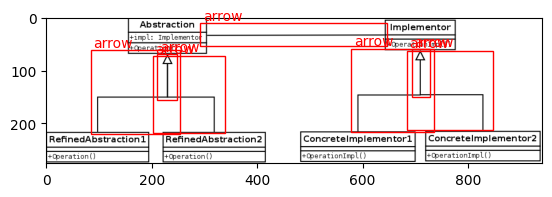



Number of elements per class:
arrow: 7


tensor([692.9927,  59.5989, 727.0041, 149.0860]) tensor(0.8854) arrow
tensor([201.6947,  72.2301, 338.2031, 217.6361]) tensor(0.8841) arrow
tensor([210.0420,  69.0856, 246.9014, 154.7231]) tensor(0.8788) arrow
tensor([683.8920,  61.5759, 847.1186, 213.3140]) tensor(0.8769) arrow
tensor([578.7164,  57.8540, 734.8381, 216.3882]) tensor(0.8416) arrow
tensor([ 84.2206,  60.8981, 252.8074, 220.5891]) tensor(0.7748) arrow
tensor([291.7317,   9.5858, 646.2210,  52.6906]) tensor(0.7619) arrow
Total number of preictions:  7 



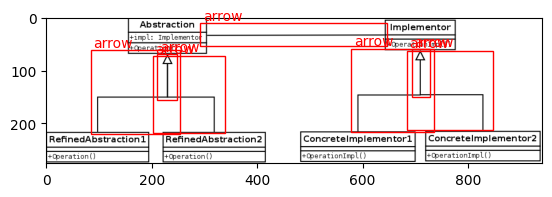



tensor([692.9927,  59.5989, 727.0041, 149.0860]) arrow tensor(0.8854)
tensor([201.6947,  72.2301, 338.2031, 217.6361]) arrow tensor(0.8841)
tensor([210.0420,  69.0856, 246.9014, 154.7231]) arrow tensor(0.8788)
tensor([683.8920,  61.5759, 847.1186, 213.3140]) arrow tensor(0.8769)
tensor([578.7164,  57.8540, 734.8381, 216.3882]) arrow tensor(0.8416)
tensor([ 84.2206,  60.8981, 252.8074, 220.5891]) arrow tensor(0.7748)
tensor([291.7317,   9.5858, 646.2210,  52.6906]) arrow tensor(0.7619)


In [ ]:
image=utils.read_image('/content/drive/My Drive/dataset_label/test/02_uml.png')

# Creazione dell'oggetto UMLClassSegmenter
acc_threshold = 0.7
iou_threshold=0.2
desired_class = 'arrow'
arrow_extractor = arrow_feature_extractor(image,acc_threshold,iou_threshold,desired_class)
images = arrow_extractor.get_arrow()

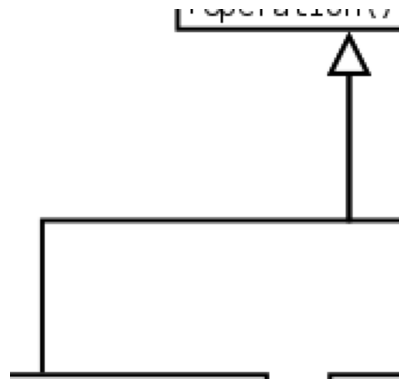

32


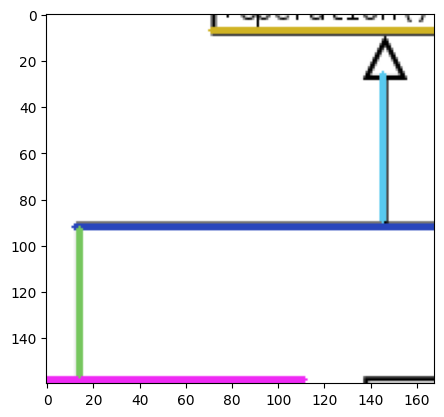

5


In [ ]:
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Leggi l'immagine
image = images[5]
height , width , channel = image.shape
plt.imshow(image)
plt.axis('off')
plt.show()

# Converte l'immagine in scala di grigi
img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Inizializza l'immagine di output
out = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

# Applica un filtro di sfocatura mediana e inverte l'immagine
img = 255 - cv2.medianBlur(img, 3)

# Rileva e disegna le linee
theta_resolution_degrees = 45
theta_resolution_radians = np.pi / 180 * theta_resolution_degrees
min_size = min(height, width)
threshold = math.floor(0.2 * min_size) #20% del minimo tra lungh e hight
print(threshold)
lines = cv2.HoughLinesP(img, 1, theta_resolution_radians, 20, minLineLength = threshold, maxLineGap=2)

colors = [(random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)) for _ in range(len(lines))]

# Trova il centro di ciascuna linea
centers = []
for line in lines:
    for x1, y1, x2, y2 in line:
        center_x = round((x1 + x2) / 2)
        center_y = round((y1 + y2) / 2)
        centers.append((center_x, center_y))

# Raggruppa le linee con lo stesso centro (con tolleranza di 5 pixel)
grouped_lines = {}
for i, (center_x, center_y) in enumerate(centers):
    grouped = False
    for center, group in grouped_lines.items():
        if abs(center_x - center[0]) <= 5 and abs(center_y - center[1]) <= 5:
            group.append(lines[i])
            grouped = True
            break
    if not grouped:
        grouped_lines[(center_x, center_y)] = [lines[i]]

# Trova la linea più lunga in ogni gruppo
selected_lines = []
for group in grouped_lines.values():
    longest_length = 0
    longest_line = None
    for line in group:
        for x1, y1, x2, y2 in line:
            length = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
            if length > longest_length:
                longest_length = length
                longest_line = line
    if longest_line is not None:
        selected_lines.append(longest_line)

# Disegna solo le linee selezionate
count = 0
for line in selected_lines:
    count +=1
    for x1, y1, x2, y2 in line:
        color = colors[np.where((lines == line).all(axis=(1, 2)))[0][0]]
        cv2.line(out, (x1, y1), (x2, y2), color, 2)

plt.imshow(out)
plt.axis('on')
plt.show()
print(count)


###Versione HoughLinesP Advanced

Algoritmo :

1. Applico il greyscle e la gaussiana(per il noise) all'immagine
2. Uso HoughLinesP per selezionare le linee
3. Trovo per ogni linea il punto centrale , e aggrego in gruppi le linee che hanno il centro uguale con una tolleranza di 20px. (l'algoritmo mi trovava per ogni linea , molte linee , questo sfalsava il calcolo della lunghezza della freccia)
3. filtro il gruppo , facendo rimanere per ogni centro solo una delle tante linee trovate
4. Ora voglio filtrare le linee distanti non connesse , che corrispondono al rumore , quindi linee identificate per sbaglio e facenti parti di altre cose. Quidi dalle linee selected_lines , rimangono solo le linee che hanno una linea vicina a meno di una threshold
5. le linee rimanenti corrispondo alla freccia e ci calcolo la distanza

Image Shape:  (276, 941, 3)
Filtered predictions after thresholding, keeping only the 'class' class.
Total number of predictions:  7 



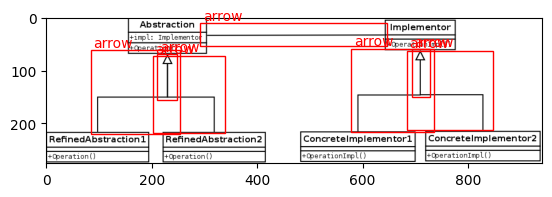



Number of elements per class:
arrow: 7


tensor([692.9927,  59.5989, 727.0041, 149.0860]) tensor(0.8854) arrow
tensor([201.6947,  72.2301, 338.2031, 217.6361]) tensor(0.8841) arrow
tensor([210.0420,  69.0856, 246.9014, 154.7231]) tensor(0.8788) arrow
tensor([683.8920,  61.5759, 847.1186, 213.3140]) tensor(0.8769) arrow
tensor([578.7164,  57.8540, 734.8381, 216.3882]) tensor(0.8416) arrow
tensor([ 84.2206,  60.8981, 252.8074, 220.5891]) tensor(0.7748) arrow
tensor([291.7317,   9.5858, 646.2210,  52.6906]) tensor(0.7619) arrow
Total number of preictions:  7 



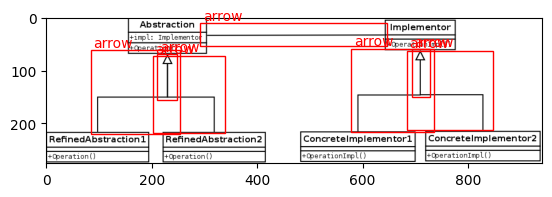



tensor([692.9927,  59.5989, 727.0041, 149.0860]) arrow tensor(0.8854)
tensor([201.6947,  72.2301, 338.2031, 217.6361]) arrow tensor(0.8841)
tensor([210.0420,  69.0856, 246.9014, 154.7231]) arrow tensor(0.8788)
tensor([683.8920,  61.5759, 847.1186, 213.3140]) arrow tensor(0.8769)
tensor([578.7164,  57.8540, 734.8381, 216.3882]) arrow tensor(0.8416)
tensor([ 84.2206,  60.8981, 252.8074, 220.5891]) arrow tensor(0.7748)
tensor([291.7317,   9.5858, 646.2210,  52.6906]) arrow tensor(0.7619)


In [9]:
image=utils.read_image('/content/drive/My Drive/dataset_label/test/02_uml.png')

# Creazione dell'oggetto UMLClassSegmenter
acc_threshold = 0.7
iou_threshold=0.2
desired_class = 'arrow'
arrow_extractor = arrow_feature_extractor_HP(image,acc_threshold,iou_threshold,desired_class)
images = arrow_extractor.get_arrow()

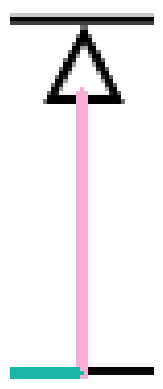

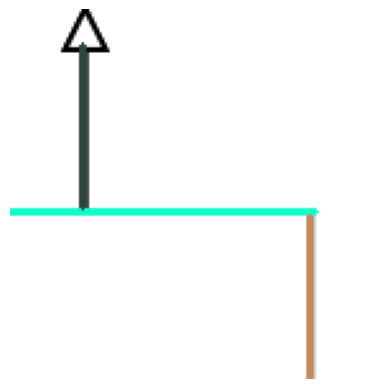

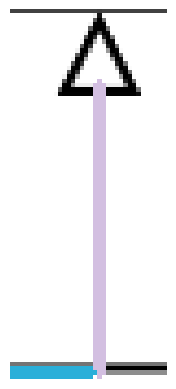

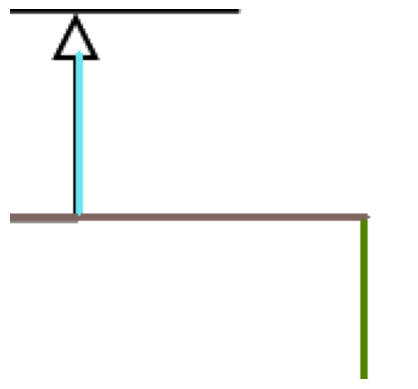

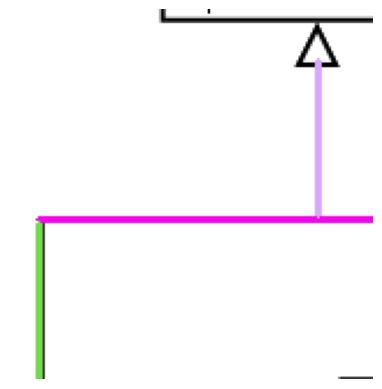

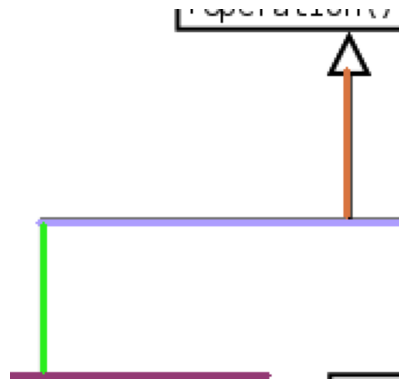

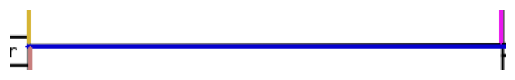

[85.0, 245.0, 84.0, 275.0, 275.0, 392.0, 403.0]


In [10]:
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

# Funzione per calcolare tutti i punti intermedi delle linee
def intermediate_points(line):
    x1, y1, x2, y2 = line[0]
    points = []
    dx = abs(x2 - x1)
    dy = abs(y2 - y1)
    steps = max(dx, dy)
    if steps == 0:
        return [(x1, y1)]
    x_inc = (x2 - x1) / steps
    y_inc = (y2 - y1) / steps
    for i in range(steps + 1):
        points.append((round(x1 + i * x_inc), round(y1 + i * y_inc)))
    return points

# Funzione per controllare se due linee hanno almeno un punto vicino tra loro
def are_lines_close(line1, line2, threshold=6):
    points_line1 = intermediate_points(line1)
    points_line2 = intermediate_points(line2)

    for x1, y1 in points_line1:
        for x2, y2 in points_line2:
            dist = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
            if dist <= threshold:
                return True
    return False

def connect_lines(image):
    height, width, channel = image.shape
    img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    out = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    img = 255 - cv2.medianBlur(img, 3)

    theta_resolution_degrees = 45
    theta_resolution_radians = np.pi / 180 * theta_resolution_degrees
    min_size = min(height, width)
    threshold = math.floor(0.2 * min_size)
    lines = cv2.HoughLinesP(img, 1, theta_resolution_radians, 20, minLineLength=threshold, maxLineGap=2)

    colors = [(random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)) for _ in range(len(lines))]

    centers = []
    for line in lines:
        for x1, y1, x2, y2 in line:
            center_x = round((x1 + x2) / 2)
            center_y = round((y1 + y2) / 2)
            centers.append((center_x, center_y))

    grouped_lines = {}
    for i, (center_x, center_y) in enumerate(centers):
        grouped = False
        for center, group in grouped_lines.items():
            if abs(center_x - center[0]) <= 20 and abs(center_y - center[1]) <= 20:  #vengono raggruppate tutte le linee che hanno come punto centrale un punto che ricade in un punto x +- 20 pixels , così riesco ad eliminare le linee che dll'algoritmo vengono trovate due volte
                group.append(lines[i])
                grouped = True
                break
        if not grouped:
            grouped_lines[(center_x, center_y)] = [lines[i]]

    selected_lines = []
    for group in grouped_lines.values():
        longest_length = 0
        longest_line = None
        for line in group:
            for x1, y1, x2, y2 in line:
                length = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
                if length > longest_length:
                    longest_length = length
                    longest_line = line
        if longest_line is not None:
            selected_lines.append(longest_line)

    connected_lines = []
    for i, line1 in enumerate(selected_lines):
        connected = False
        for j, line2 in enumerate(selected_lines):
            if i != j:
                if are_lines_close(line1, line2, threshold=6): #6 pixel threshold per mantenere il gruppo con le linee vicine , per selezionare le linee continue che compongono la freccia
                    connected = True
                    break
        if connected:
            connected_lines.append(line1)

    for line in connected_lines:
        for x1, y1, x2, y2 in line:
            color = colors[np.where((lines == line).all(axis=(1, 2)))[0][0]]
            cv2.line(out, (x1, y1), (x2, y2), color, 2)

    total_length = 0
    for line in connected_lines:
        for x1, y1, x2, y2 in line:
            length = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
            total_length += length

    return out, total_length


# Lista di immagini
images = arrow_extractor.get_arrow()

# Lista per memorizzare le lunghezze delle linee selezionate per ogni immagine
list_length = []

# Applica l'algoritmo a ciascuna immagine
for image in images:
    result_image, total_length = connect_lines(image)
    list_length.append(total_length)

    plt.imshow(result_image)
    plt.axis('off')
    plt.show()

# Stampa le lunghezze delle linee per ogni immagine
print(list_length)


# STOP EX

In [ ]:

from google.colab import runtime
runtime.unassign()